In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [58]:
plt.style.use('ggplot')

In [59]:
plt.style.use('seaborn-bright')

In [60]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_with_clusters.csv")

In [61]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

## Filling null values

In [62]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [63]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

In [64]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   event_source.hash                    3000 non-null   object 
 1   ACCOUNT_NUM.hash                     3000 non-null   object 
 2   CUSTOMER_REF.hash                    3000 non-null   object 
 3   ONNET_OUTGOING_Categorical           3000 non-null   object 
 4   ONNET_OUTGOING_Scaled                3000 non-null   float64
 5   ONNET_OUTGOING_Outlier               3000 non-null   object 
 6   ONNET_INCOMING_Categorical           3000 non-null   object 
 7   ONNET_INCOMING_Scaled                2890 non-null   float64
 8   ONNET_INCOMING_Outlier               2890 non-null   object 
 9   OFFNET_OUTGOING_Categorical          3000 non-null   object 
 10  OFFNET_OUTGOING_Scaled               2886 non-null   float64
 11  OFFNET_OUTGOING_Outlier       

### Cluster Counts

In [65]:
user_profile["Cluster"].value_counts()

1    1476
2     847
0     677
Name: Cluster, dtype: int64

<AxesSubplot:ylabel='Cluster'>

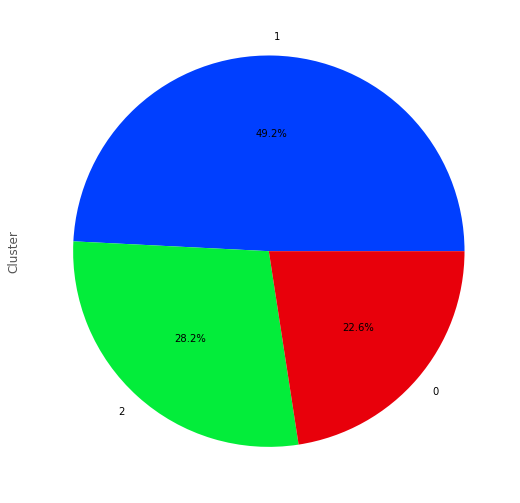

In [66]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [67]:
cluster_0 = user_profile[(user_profile["Cluster"]==0)]

In [68]:
cluster_0.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             677.000000             672.000000              671.000000   
mean                0.148841               0.154458                0.142442   
std                 0.123431               0.122738                0.143780   
min                 0.001202               0.001202                0.001202   
25%                 0.047513               0.055160                0.040031   
50%                 0.126177               0.132469                0.100962   
75%                 0.221080               0.229739                0.187770   
max                 1.000000               0.961538                1.000000   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              674.000000           671.000000           310.000000   
mean                 0.148787             0.149686             0.108995   
std                  0.114013             0.194129             0.148035   
min                  0.001202             0.002500             0.004808   
25%                  0.065544             0.021667             0.016026   
50%                  0.130323             0.064333             0.051282   
75%                  0.197598             0.190833             0.142228   
max                  0.948718             0.882000             0.818910   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     3.100000e+02     128.000000  207.000000   
mean                      8.465171e+05       0.369678    0.416356   
std                       1.912989e+06       0.355235    0.283364   
min                       3.500000e+02       0.000000    0.006944   
25%                       4.411950e+04       0.000000    0.164931   
50%                       1.937335e+05       0.321875    0.348958   
75%                       6.329025e+05       0.681250    0.625000   
max                       1.342376e+07       0.950000    1.000000   

        BIRTH_YEAR         AGE  BB_Extra_GB_Purchased_Times  \
count   485.000000  485.000000                   132.000000   
mean   1959.195876   61.804124                    12.007576   
std      15.565669   15.565669                    15.410166   
min    1911.000000   26.000000                     1.000000   
25%    1947.000000   50.000000                     2.000000   
50%    1958.000000   63.000000                     4.000000   
75%    1971.000000   74.000000                    16.250000   
max    1995.000000  110.000000                    58.000000   

       BB_Extra_GB_Purchased_Scaled  Having_Senior_Citizen_Scaled  \
count                    132.000000                    677.000000   
mean                       0.191452                      0.252585   
std                        0.264517                      0.229380   
min                        0.010000                      0.000000   
25%                        0.017241                      0.000000   
50%                        0.051724                      0.300000   
75%                        0.262931                      0.400000   
max                        0.982759                      1.000000   

       Having_Kids_at_Home_Scaled  Having_Teenagers_Students_Scaled  \
count                  677.000000                        677.000000   
mean                     0.193131                          0.111226   
std                      0.161083                          0.190975   
min                      0.000000                          0.000000   
25%                      0.100000                          0.000000   
50%                      0.200000                          0.000000   
75%                      0.200000                          0.100000   
max                      1.100000                          1.000000   

       Having_Working_Professionals_Scaled  \
count                           677.000000   
mean                              0.164476   
std                          

#### Distribution: Usage

<AxesSubplot:>

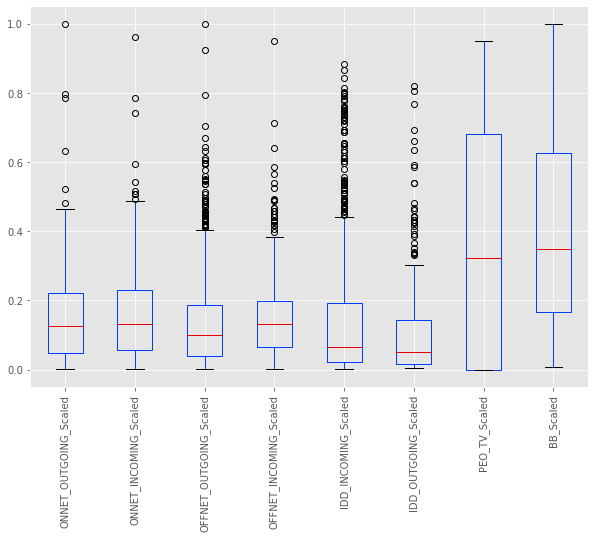

In [69]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

#### Usage of randomly selected users

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

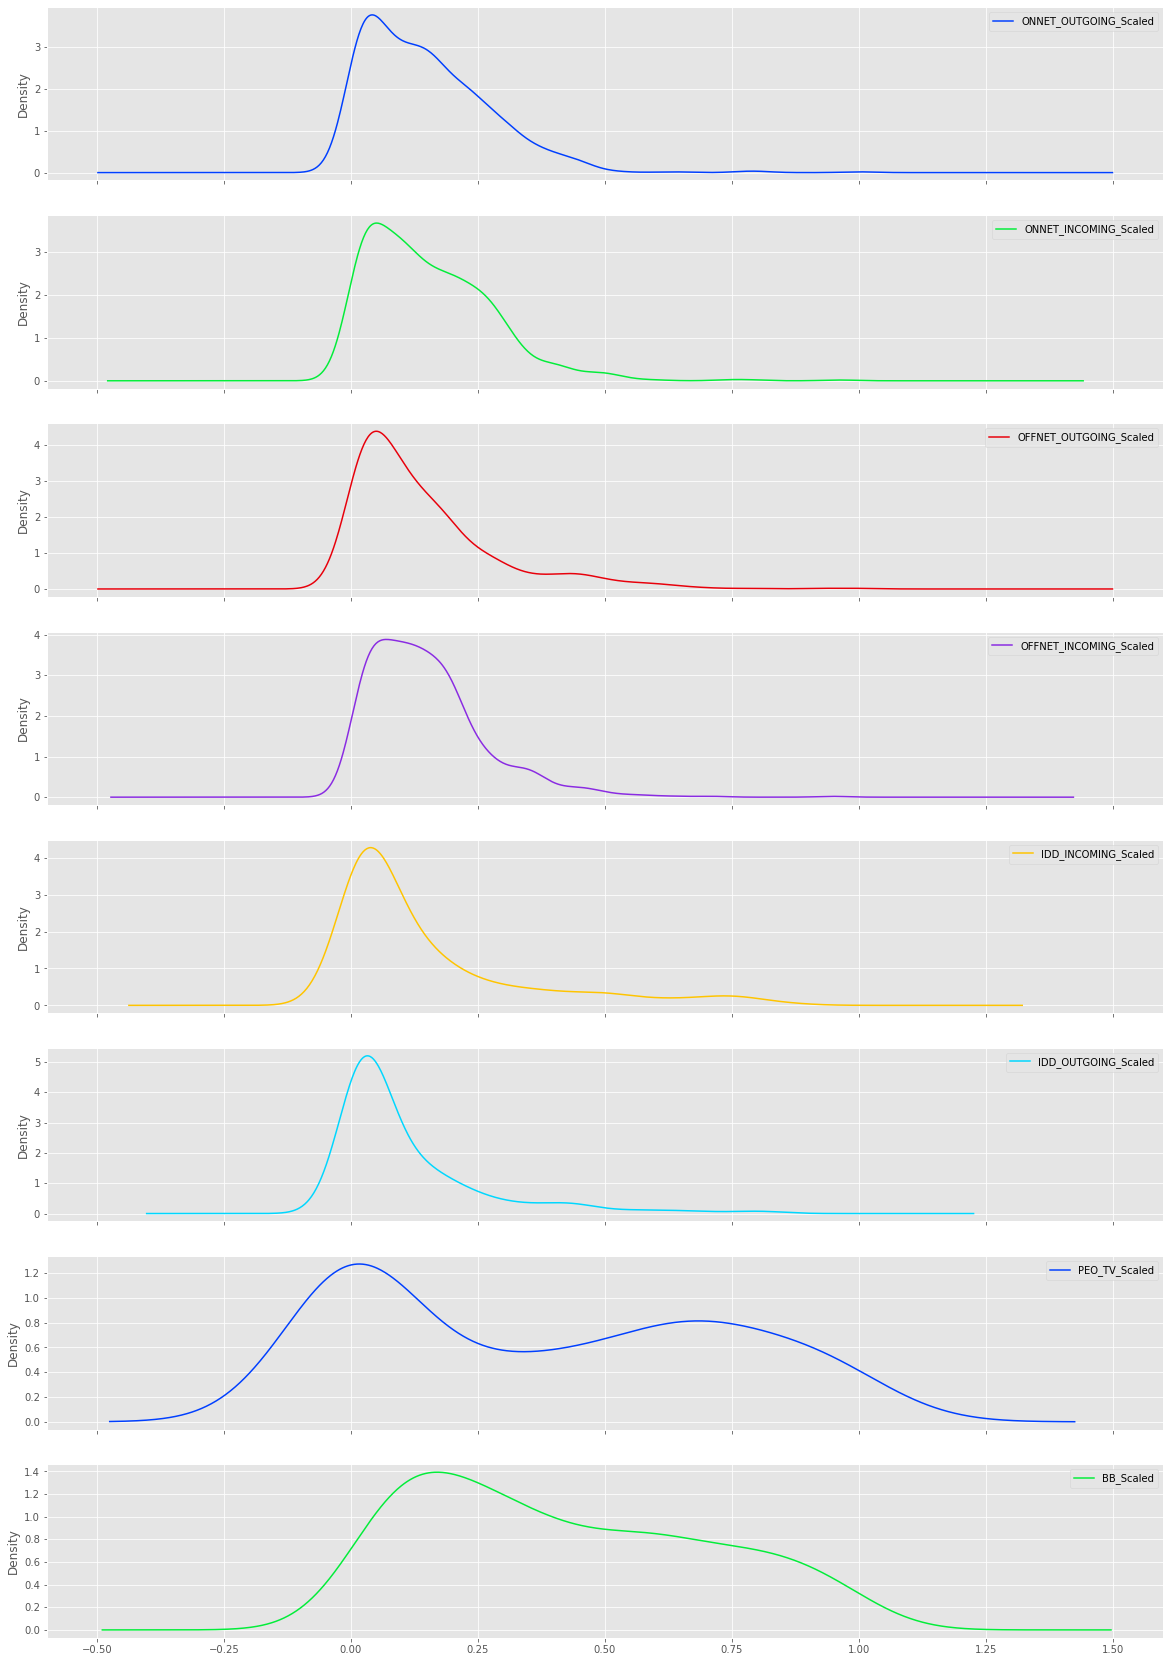

In [70]:
cluster_0.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>],
       [<AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>],
       [<AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Teenager

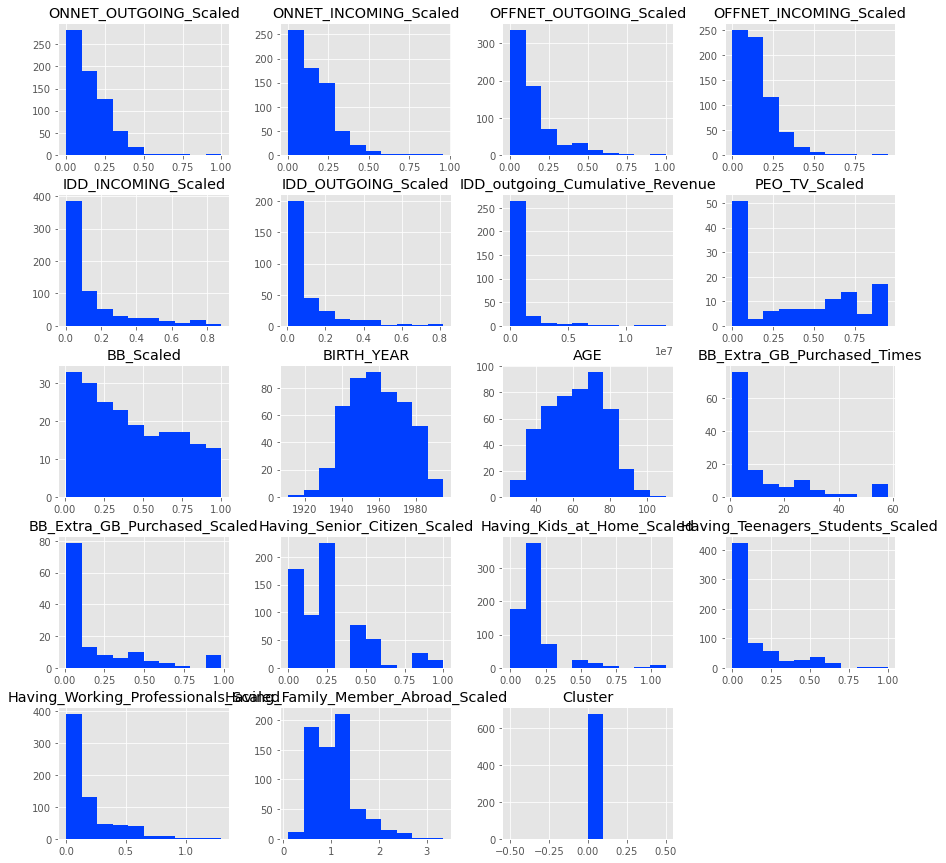

In [71]:
cluster_0.hist(figsize=(15,15))

### Subscription Type and Usage

In [72]:
cluster_0["Sub_Type"].value_counts()

TRIPLE_PLAY       540
DOUBLE_PLAY_BV     75
SINGLE_PLAY        46
DOUBLE_PLAY_PV     16
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

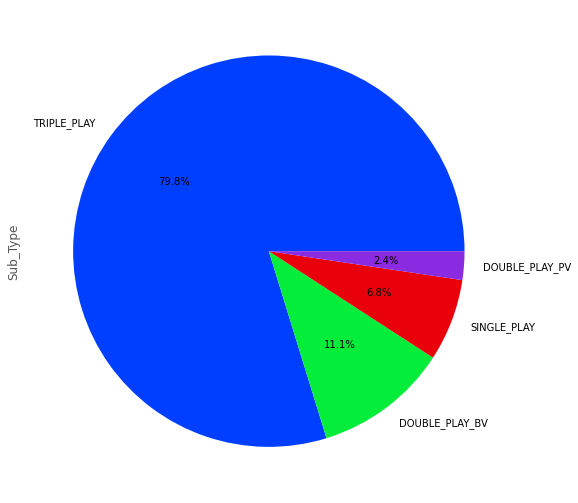

In [73]:
cluster_0["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [74]:
cluster_0["Sub_Usage"].value_counts()

['VOICE_LOW', 'BB_NO_INFO', 'TV_NO_INFO']       250
['VOICE_MEDIUM', 'BB_NO_INFO', 'TV_NO_INFO']    129
['VOICE_LOW', 'BB_LOW', 'TV_NO_INFO']            48
['VOICE_HIGH', 'BB_NO_INFO', 'TV_NO_INFO']       36
['VOICE_LOW', 'BB_MEDIUM', 'TV_NO_INFO']         29
['VOICE_LOW', 'BB_NO_INFO', 'TV_NO']             17
['VOICE_LOW', 'BB_HIGH', 'TV_NO_INFO']           14
['VOICE_MEDIUM', 'BB_LOW', 'TV_NO_INFO']         12
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_NO_INFO']      11
['VOICE_LOW', 'BB_NO_INFO', 'TV_HIGH']           10
['VOICE_LOW', 'BB_LOW', 'TV_NO']                 10
['VOICE_LOW', 'BB_HIGH', 'TV_NO']                 8
['VOICE_MEDIUM', 'BB_HIGH', 'TV_NO_INFO']         8
['VOICE_HIGH', 'BB_LOW', 'TV_NO_INFO']            7
['VOICE_LOW', 'BB_NO_INFO', 'TV_MEDIUM']          6
['VOICE_LOW', 'BB_NO_INFO', 'TV_LOW']             5
['VOICE_LOW', 'BB_MEDIUM', 'TV_HIGH']             5
['VOICE_MEDIUM', 'BB_NO_INFO', 'TV_MEDIUM']       5
['VOICE_MEDIUM', 'BB_HIGH', 'TV_HIGH']            5
['VOICE_MEDI

In [75]:
len(cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

677

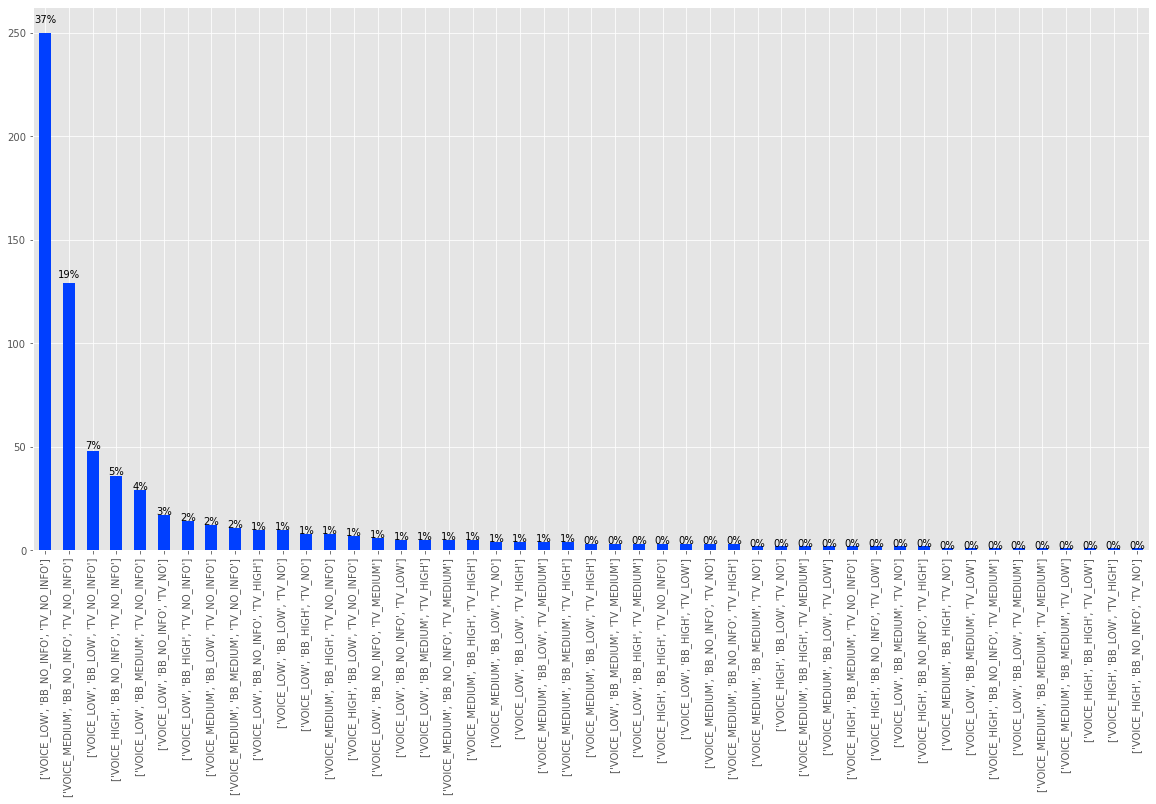

In [76]:
ax =cluster_0[(cluster_0["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [77]:
cluster_0["VOICE_Categorical"].value_counts()

LOW       419
MEDIUM    200
HIGH       58
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

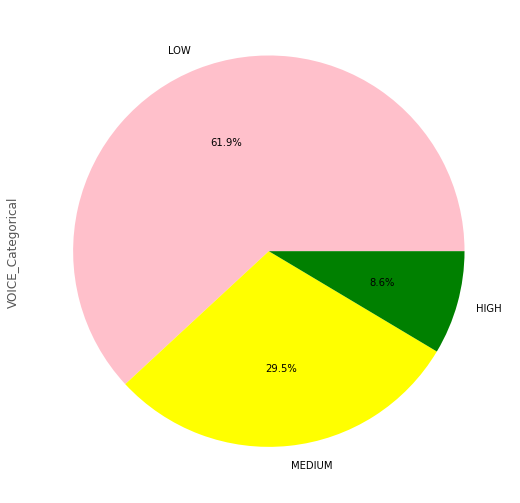

In [80]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','green'] )

### VOICE VAS Packages

In [82]:
count_dict = dict(cluster_0["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [83]:
all_voice_products_dict.pop('V_SLT Voice Service')

642

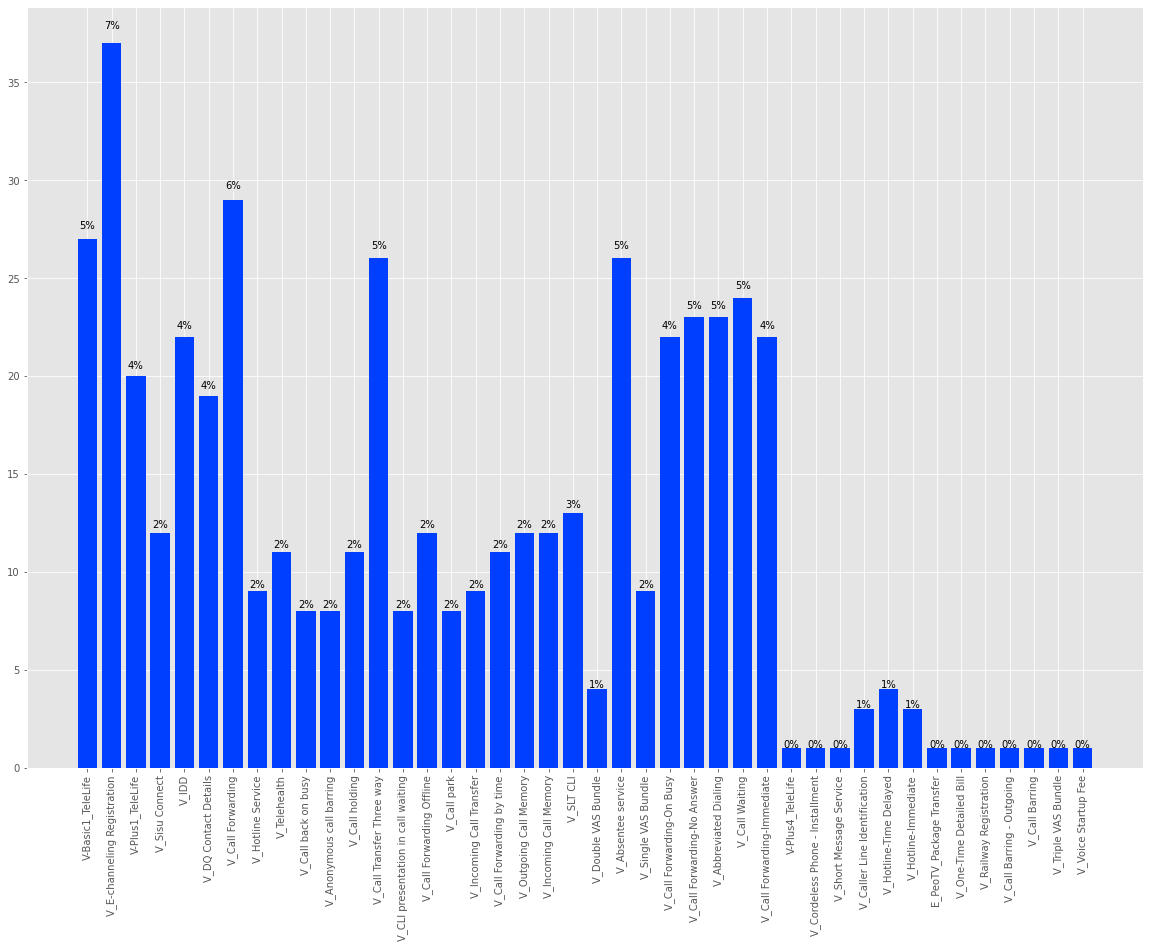

In [84]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [85]:
cluster_0["IDD_Overall_Categorical"].value_counts()

LOW       643
MEDIUM     24
HIGH       10
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

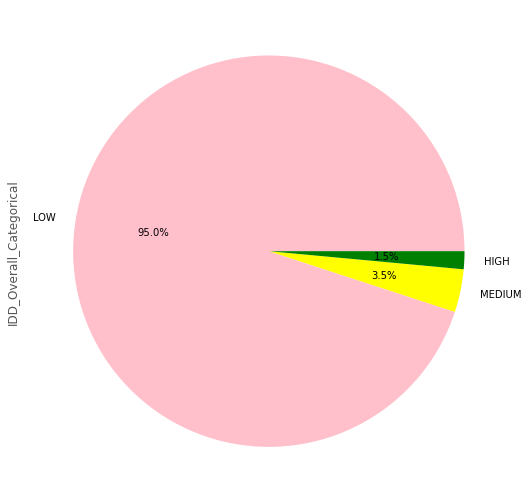

In [88]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink','yellow','green'] )

### PeoTV Usage

In [89]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO_INFO    549
NO          50
HIGH        37
MEDIUM      26
LOW         15
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

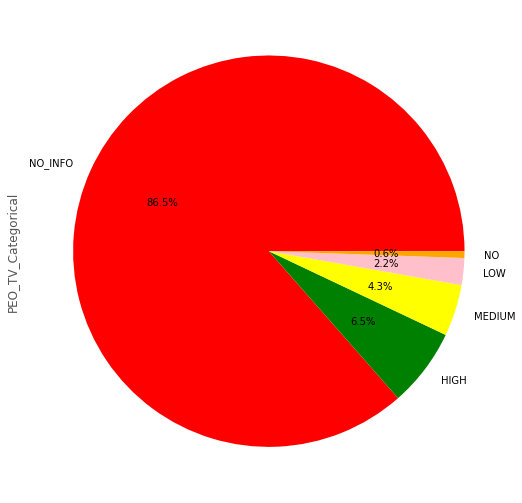

In [91]:
cluster_0_peo = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','green','yellow','pink','orange'])

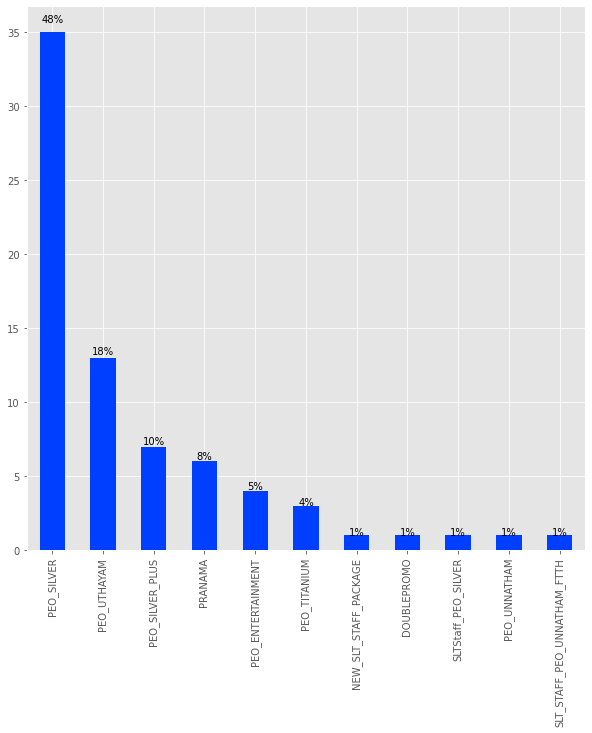

In [92]:
ax =cluster_0_peo[(cluster_0_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 0

<AxesSubplot:ylabel='PEO_TV_Categorical'>

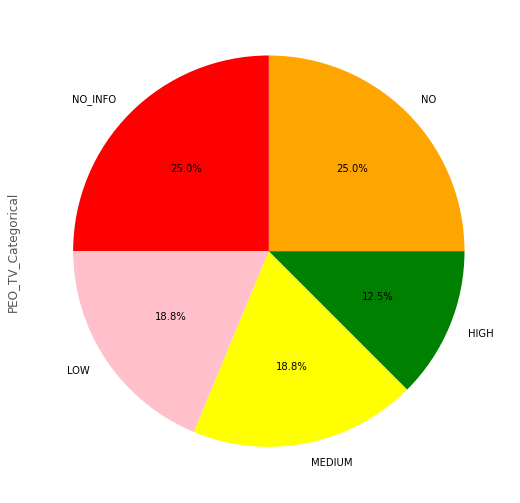

In [94]:
cluster_0_peo_pv = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['orange','red','pink','yellow','green'])

In [95]:
cluster_0_peo_pv["PEO_TV_Categorical"].value_counts()

NO         4
NO_INFO    4
LOW        3
MEDIUM     3
HIGH       2
Name: PEO_TV_Categorical, dtype: int64

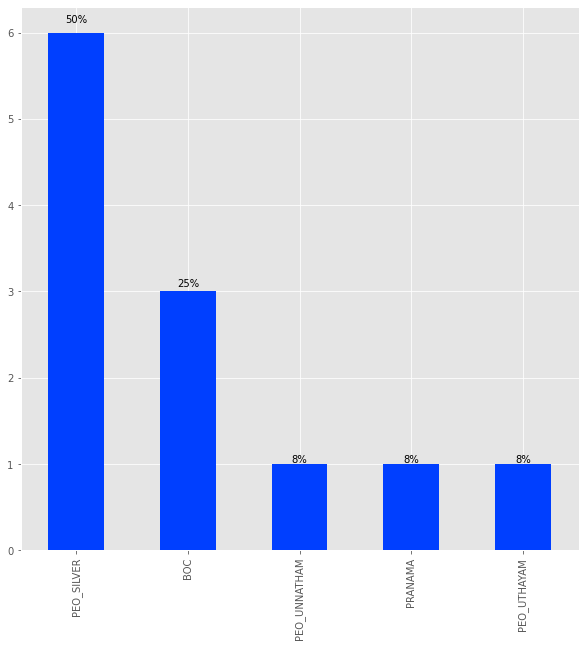

In [98]:
ax =cluster_0_peo_pv[(cluster_0_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [99]:
count_dict = dict(cluster_0["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

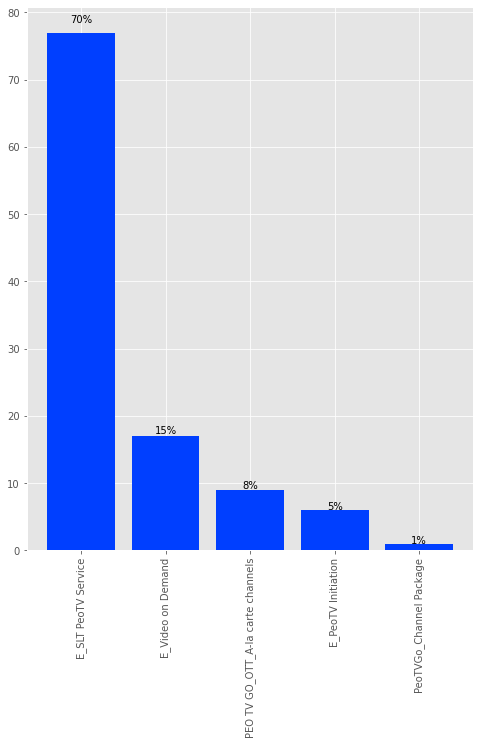

In [100]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [101]:
cluster_0["BB_Categorical"].value_counts()

NO_INFO    470
LOW         98
MEDIUM      61
HIGH        48
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

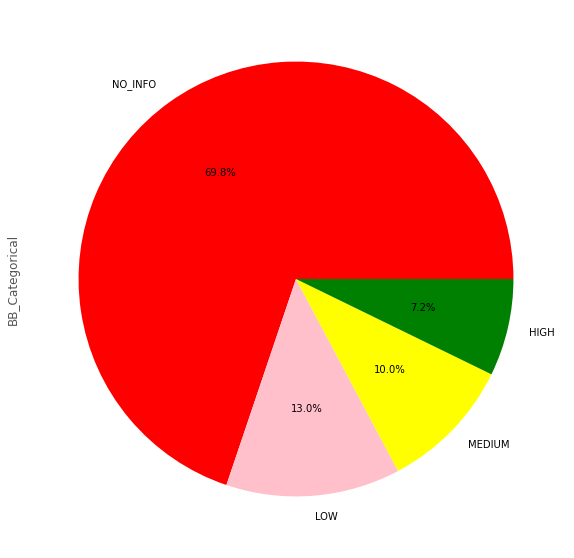

In [105]:
cluster_0_bb = cluster_0[(cluster_0["Sub_Type"] == "TRIPLE_PLAY")]
cluster_0_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 0

<AxesSubplot:ylabel='BB_Categorical'>

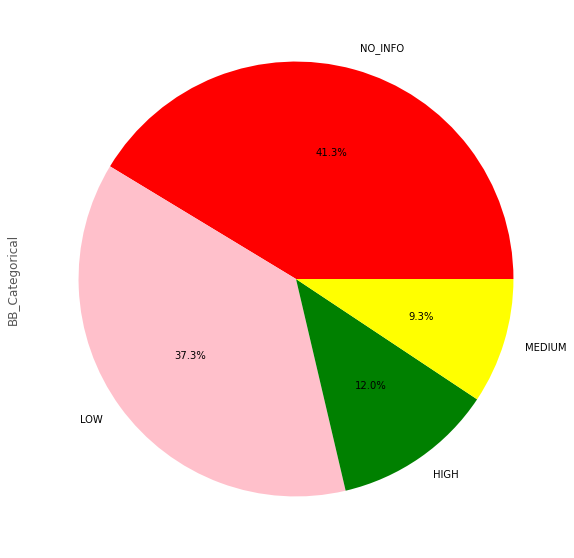

In [107]:
cluster_0_bb_dp = cluster_0[(cluster_0["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_0_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [108]:
count_dict = dict(cluster_0["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

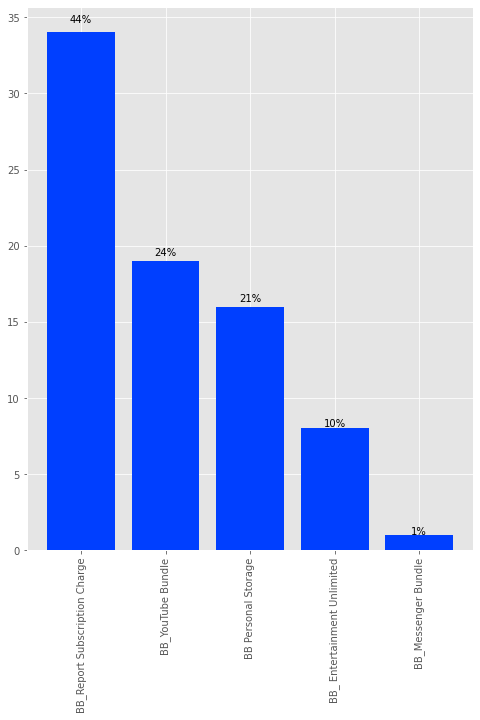

In [109]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Extra GB Usage analysis
- BB Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [185]:
extra_gb_freq_users = cluster_0[(cluster_0["BB_Extra_GB_Purchased_Times"]>10.0)]

In [186]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

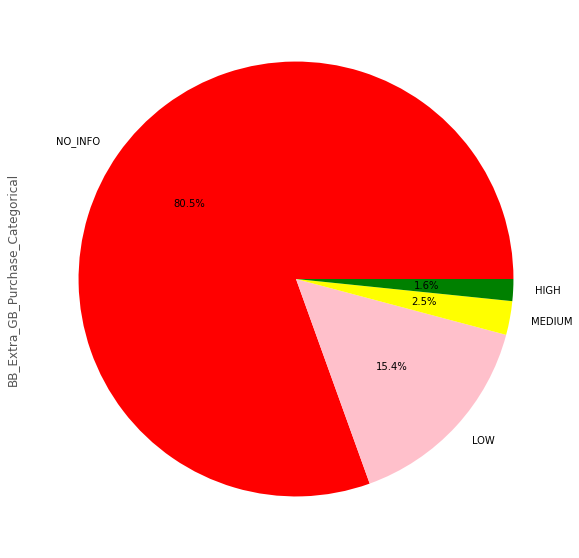

In [187]:
cluster_0["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '314e8d4cf1a5de291a540d70eefffaae'),
 Text(1, 0, 'b36a0857b23d1369fadd24c5893aa129'),
 Text(2, 0, '7b9367da168ff3bce8c3ab07bcc69081'),
 Text(3, 0, '009f305bf85a71012c0e343233e611ba'),
 Text(4, 0, '7eec59f66976cb418a8b84fbb3274e50'),
 Text(5, 0, '06b93cc32b6bfdbc24ab9c6df1da3d0b'),
 Text(6, 0, '94206a953b1c19cfbed97ab4ca5861cc'),
 Text(7, 0, 'e72fdc3f9d890d5551dd5081d53dcf8b'),
 Text(8, 0, 'd1a76a57b9ef13fb00bbd468017c0b96'),
 Text(9, 0, '22f91f68d787f423eb5d7f9eb7ee76f0'),
 Text(10, 0, '64906ac25467e1f6745fb3bd3fab4b8a'),
 Text(11, 0, '71206ecab5abd1b62ba61616197f8129'),
 Text(12, 0, 'c60c4245240a6e2dc8bd5dcd0d4cb0f0'),
 Text(13, 0, '53861460b35268b87b7161aec487dfc6'),
 Text(14, 0, '552d18e8515f81cf52f85d1cb995de16'),
 Text(15, 0, '995ae34cf08d08eaca3d7d0249578546'),
 Text(16, 0, '167671a939e03e258ca9cd94a3349a25'),
 Text(17, 0, '88cd726fd19de40b97238fd2f25e21b8'),
 Text(18, 0, 'fe20b17a9573e4b7e765cc3098728f3d'),
 Text(19, 0, 'ee4fe76990876ffba649fb71b683e91c'),
 Text(20, 

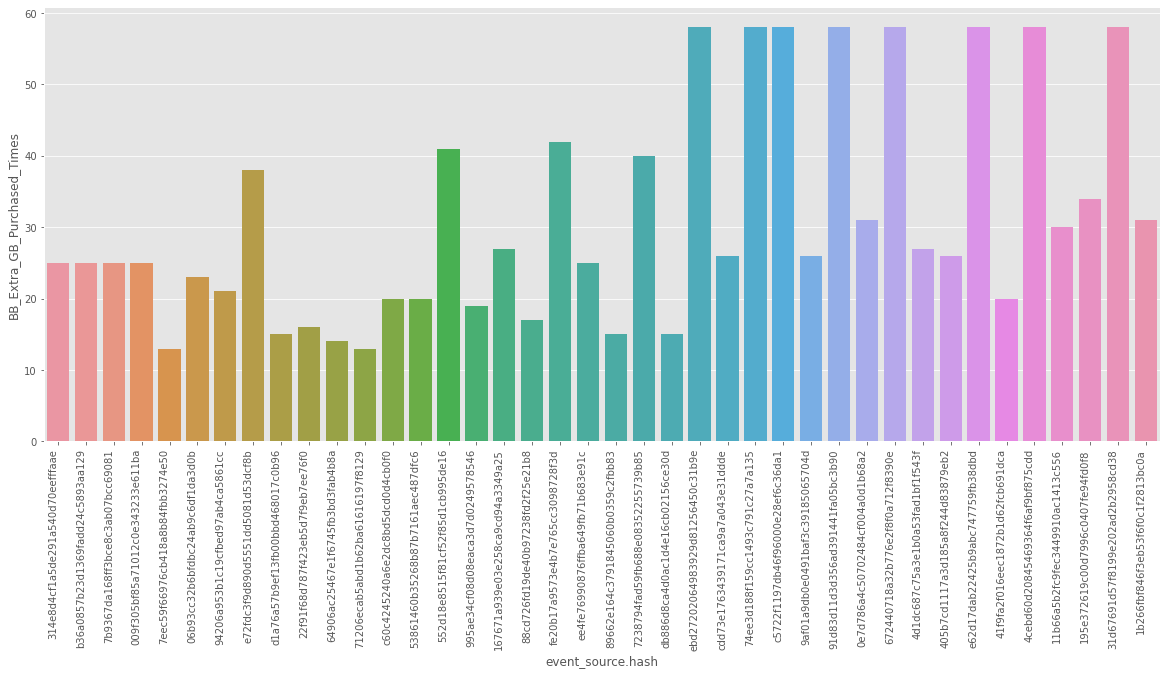

In [188]:
plt.figure(figsize=(20,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Times')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

<ipython-input-178-fb2918c10f64>:7: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



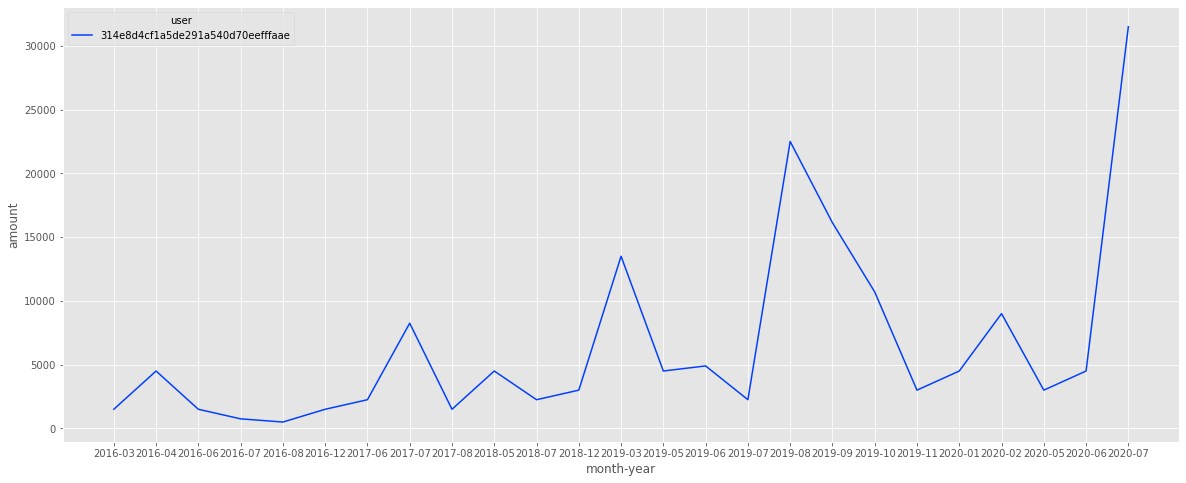

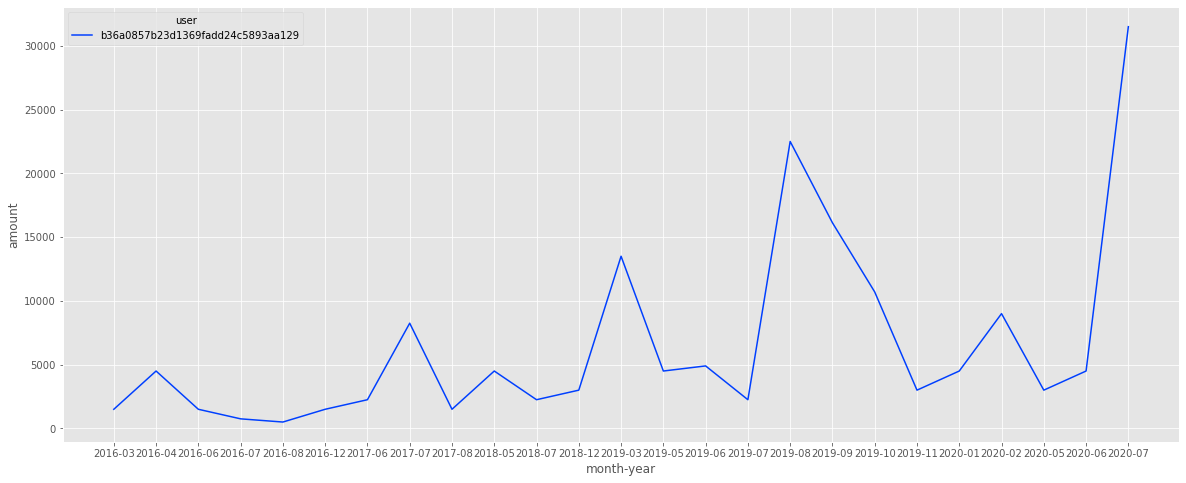

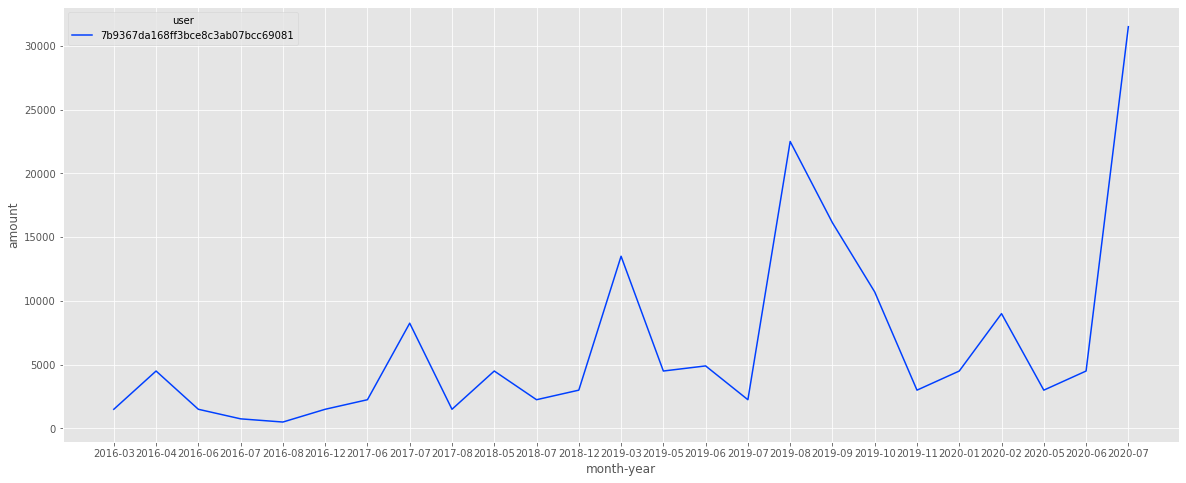

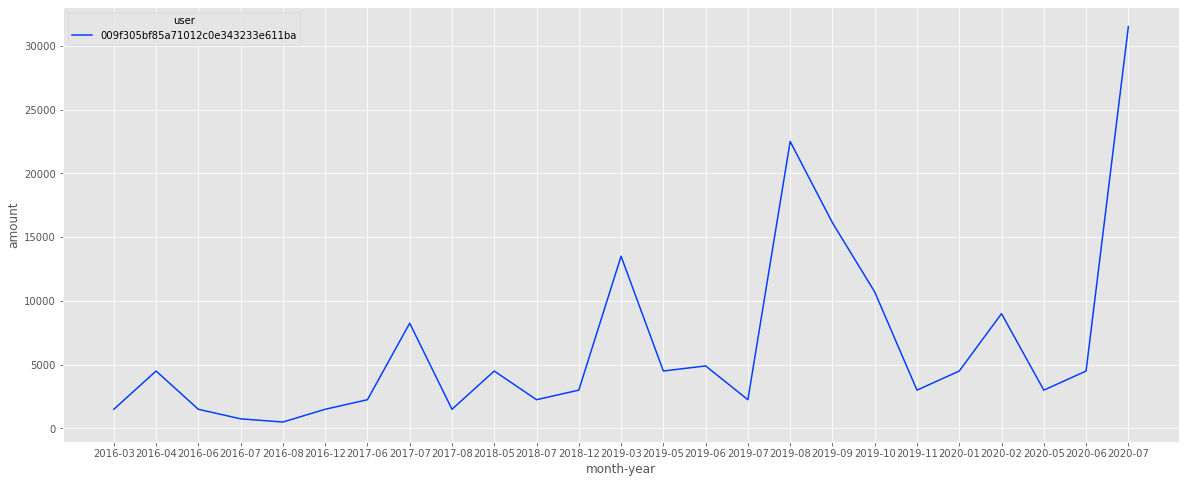

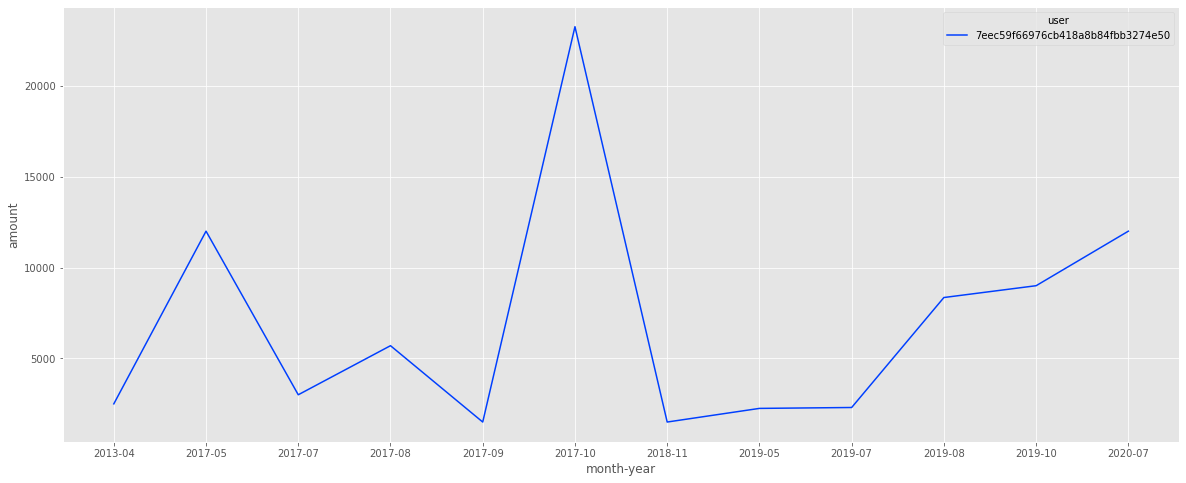

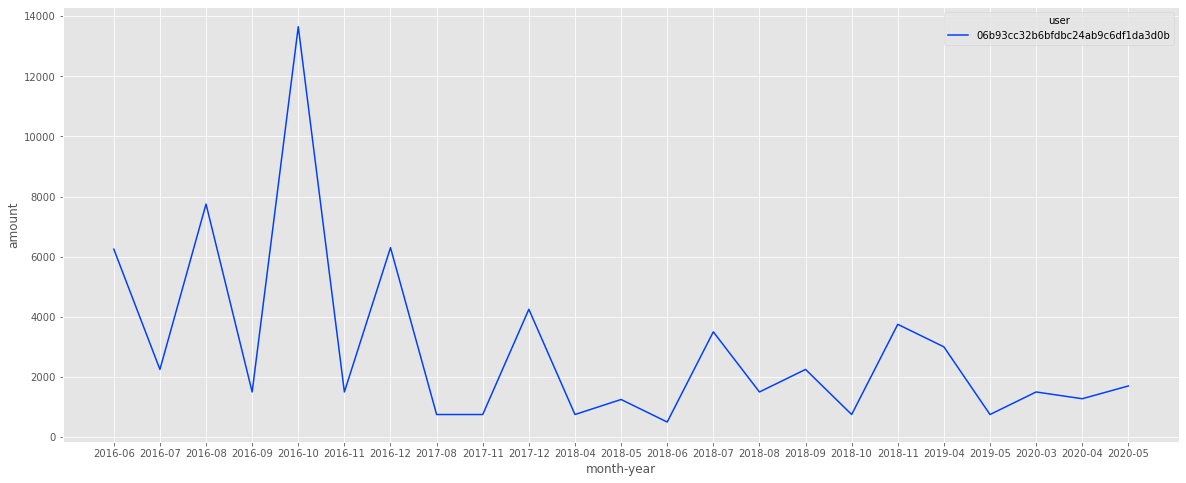

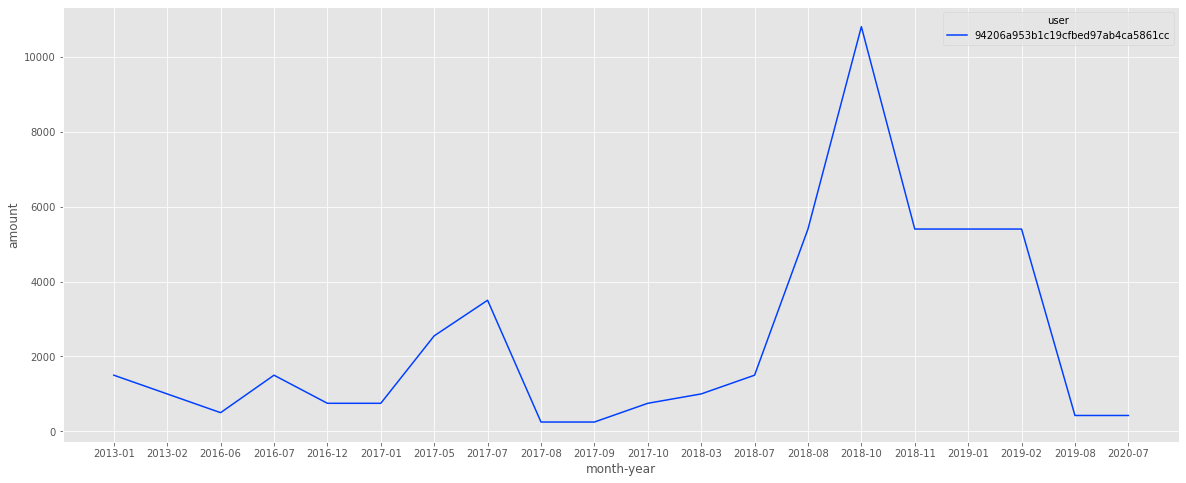

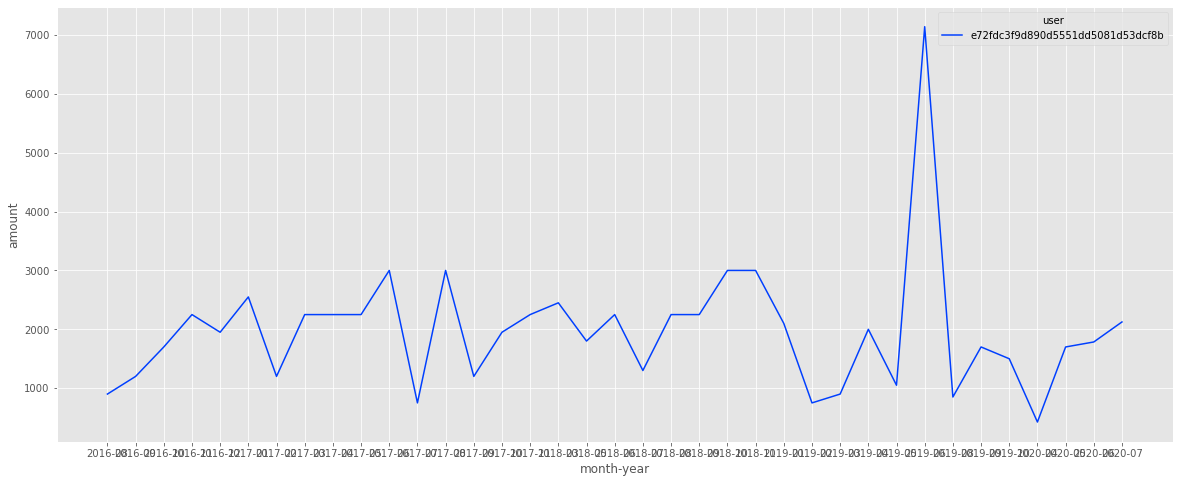

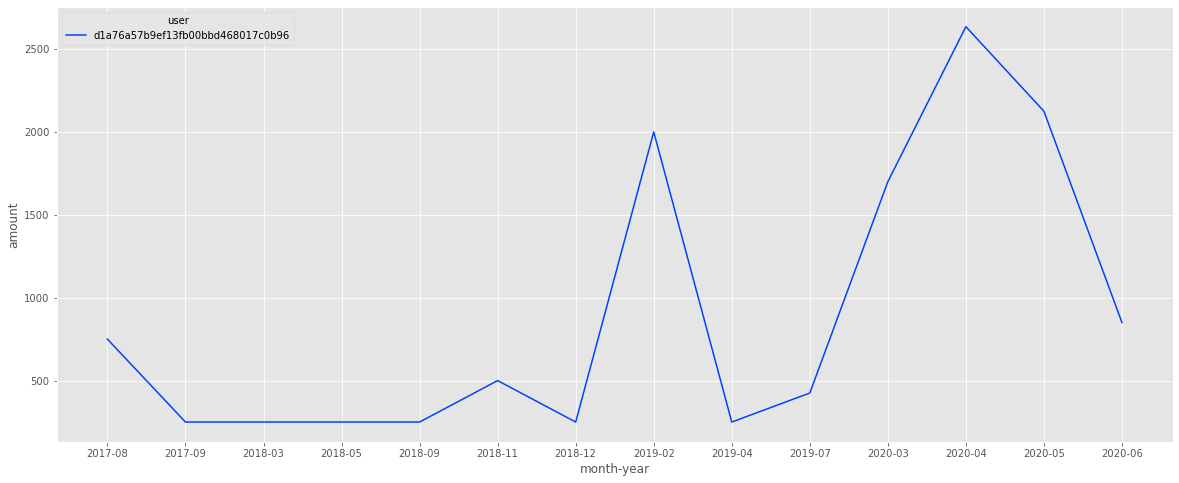

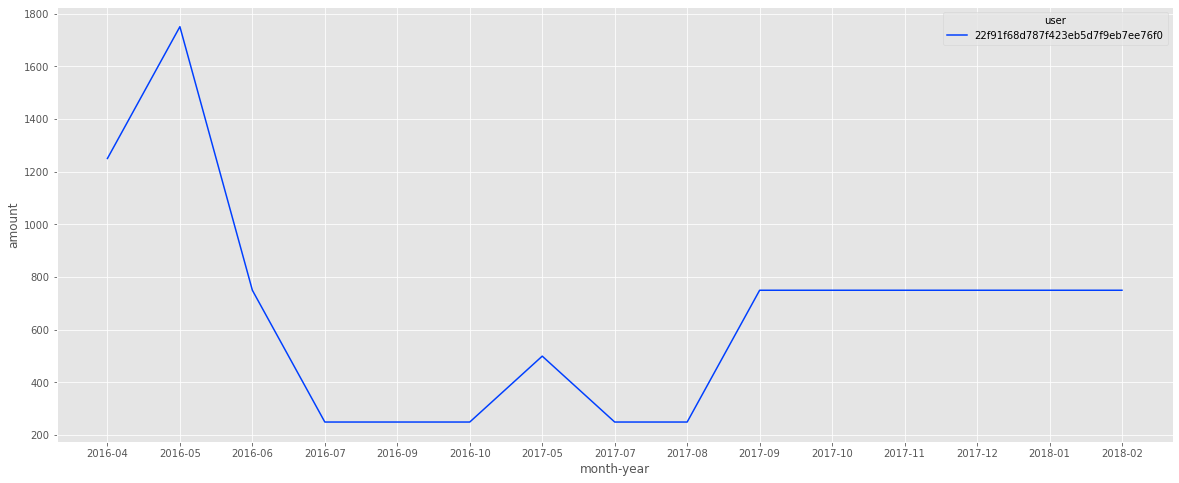

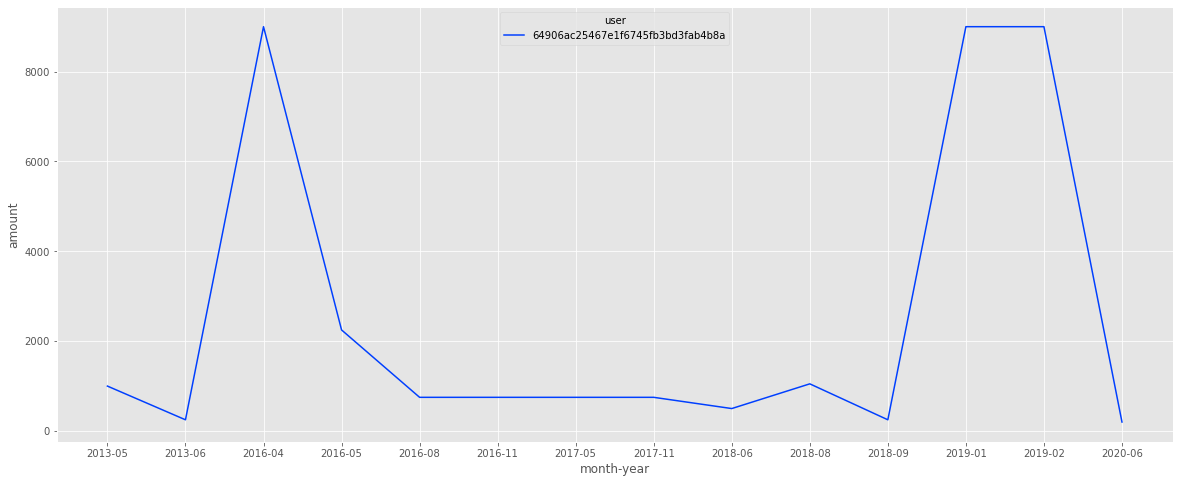

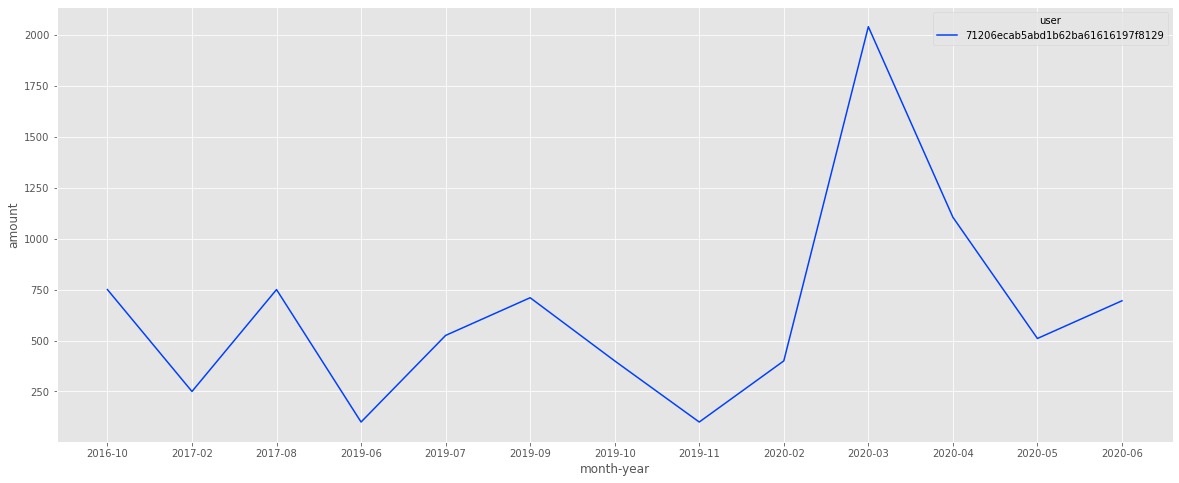

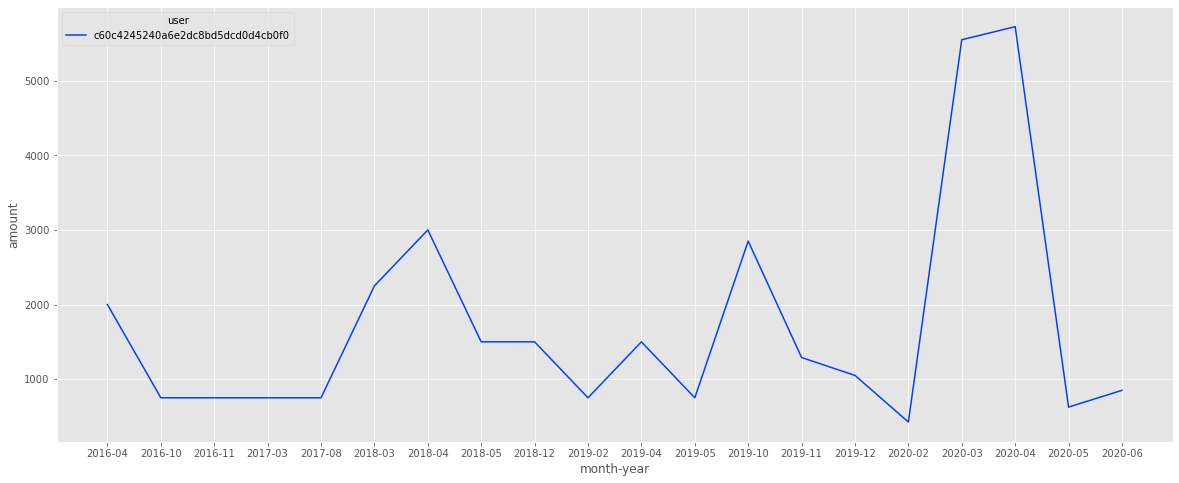

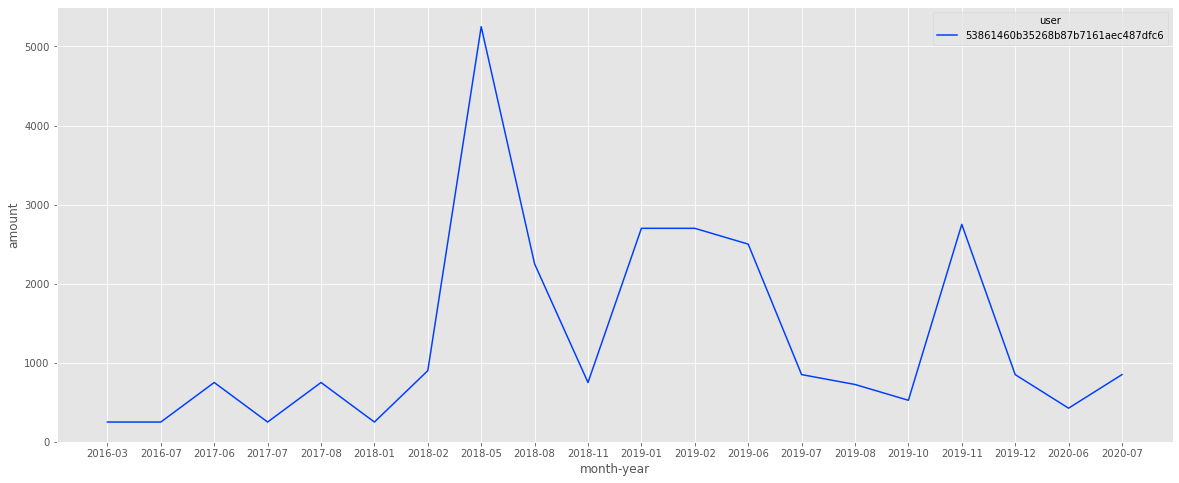

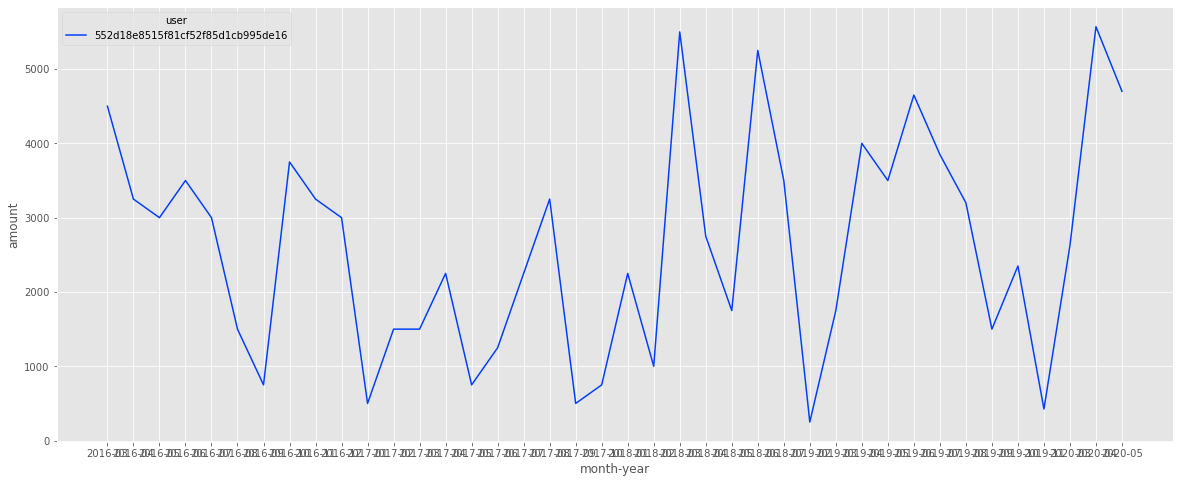

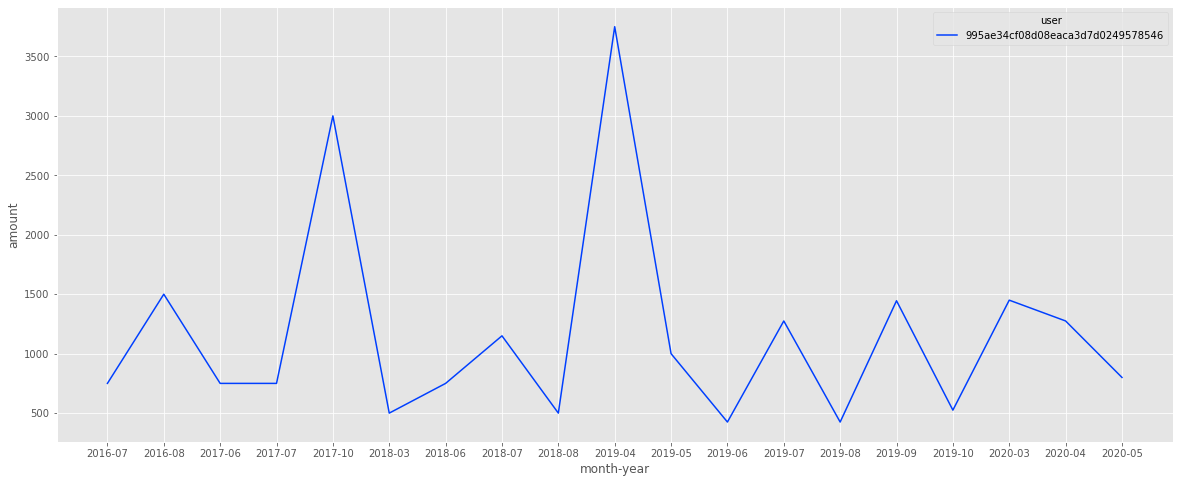

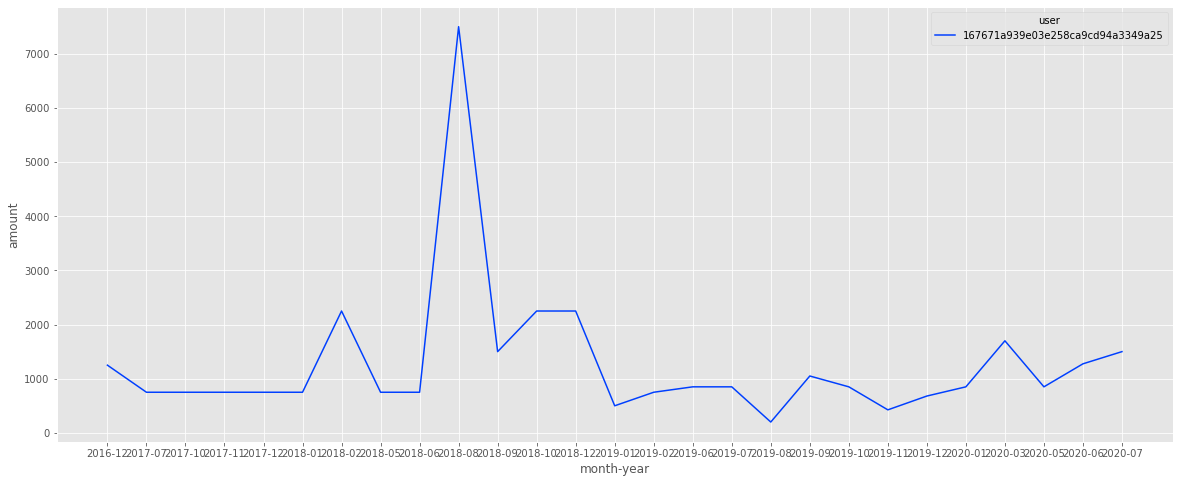

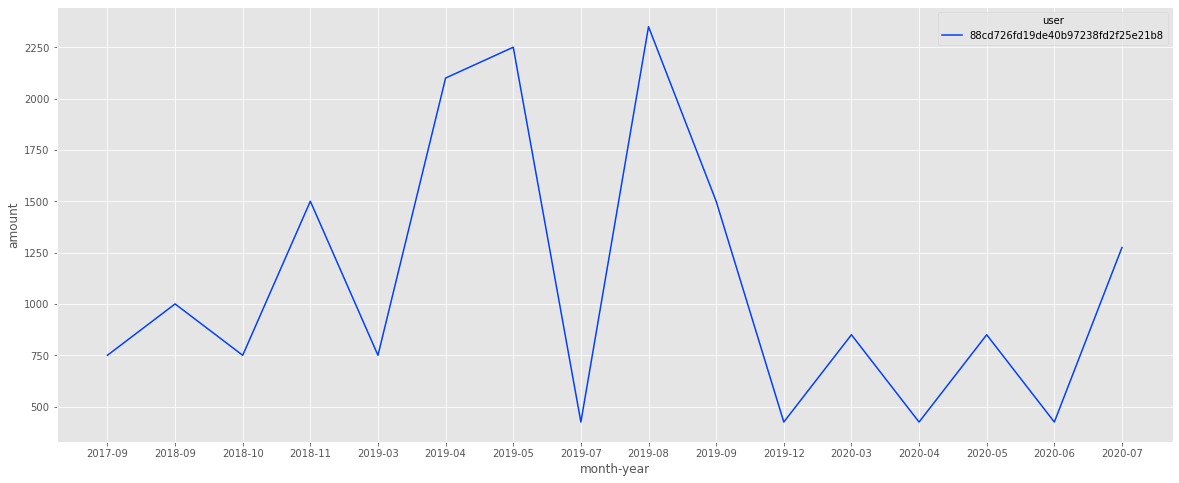

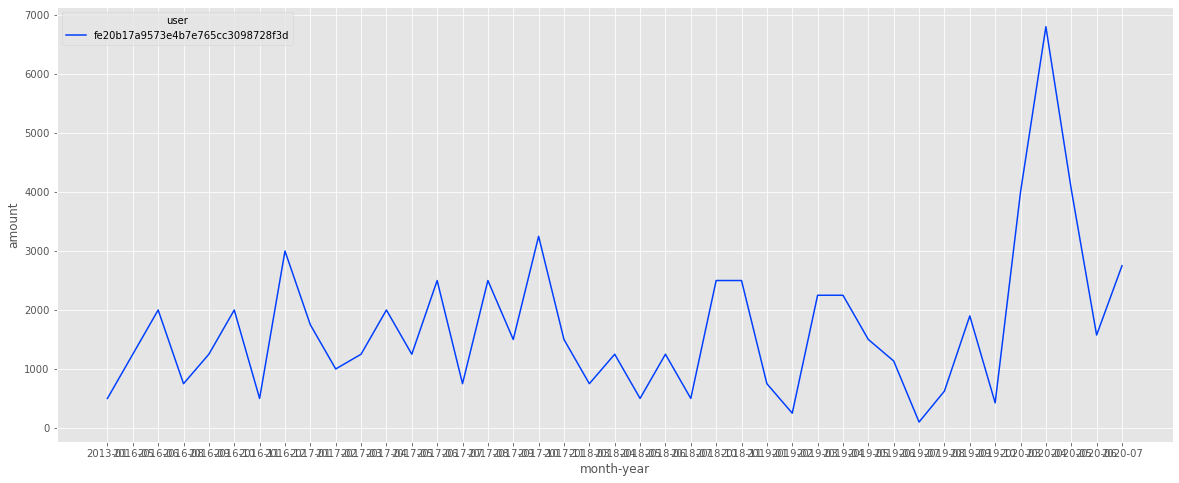

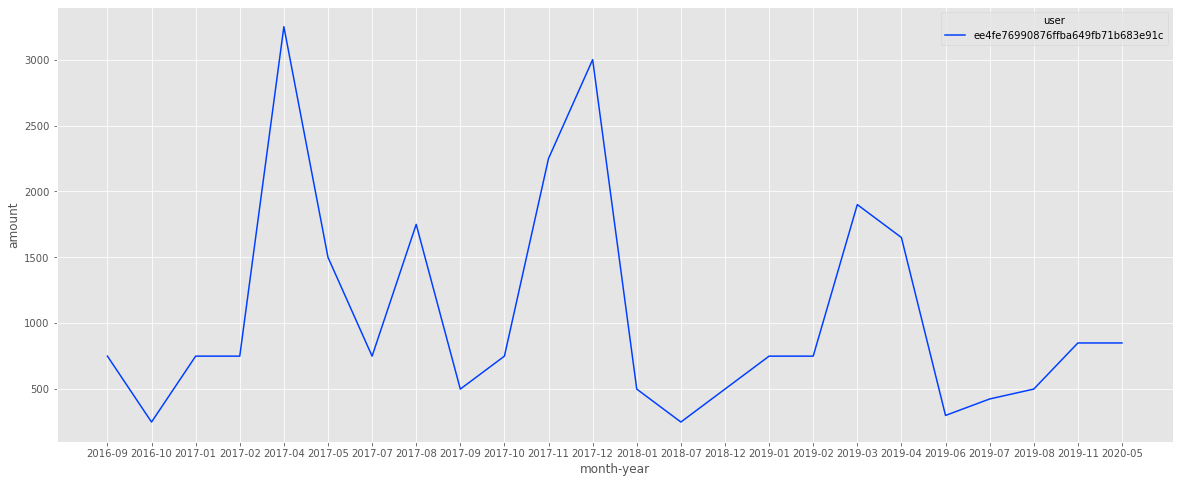

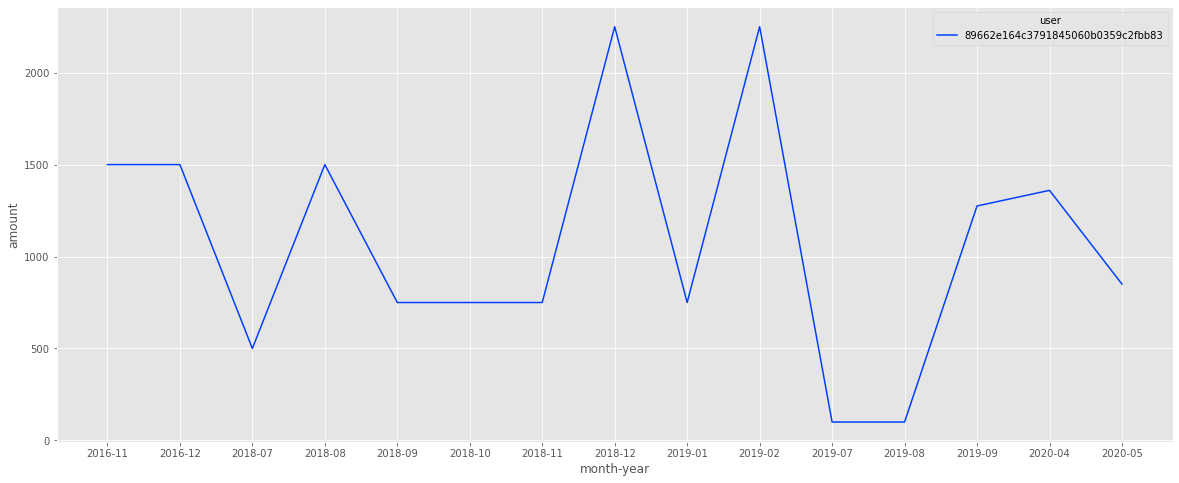

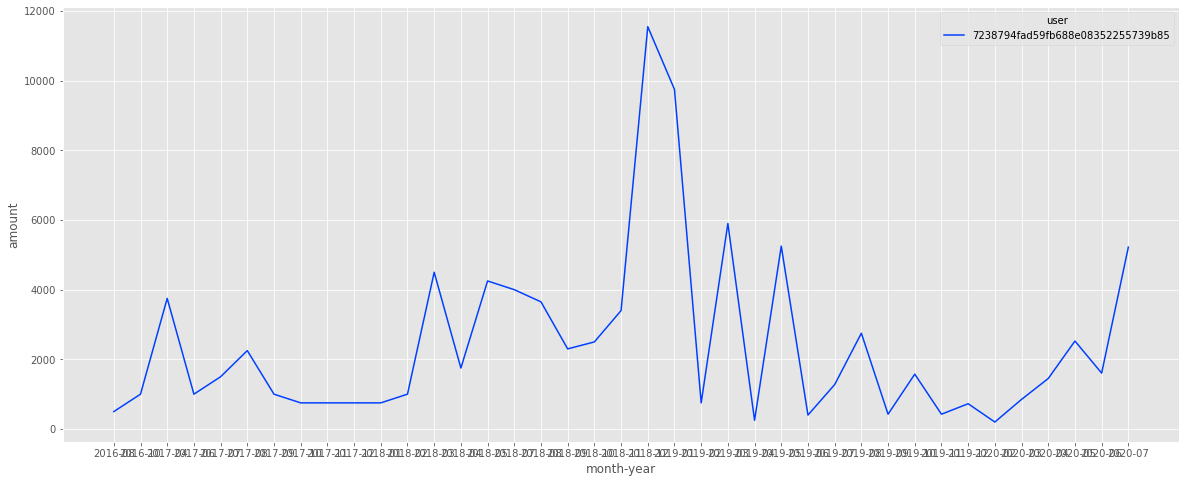

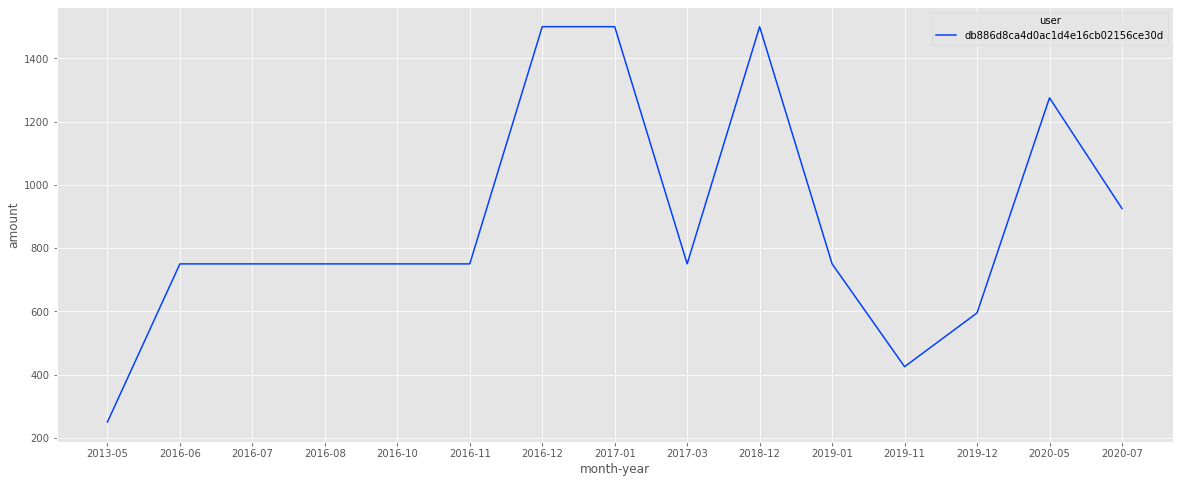

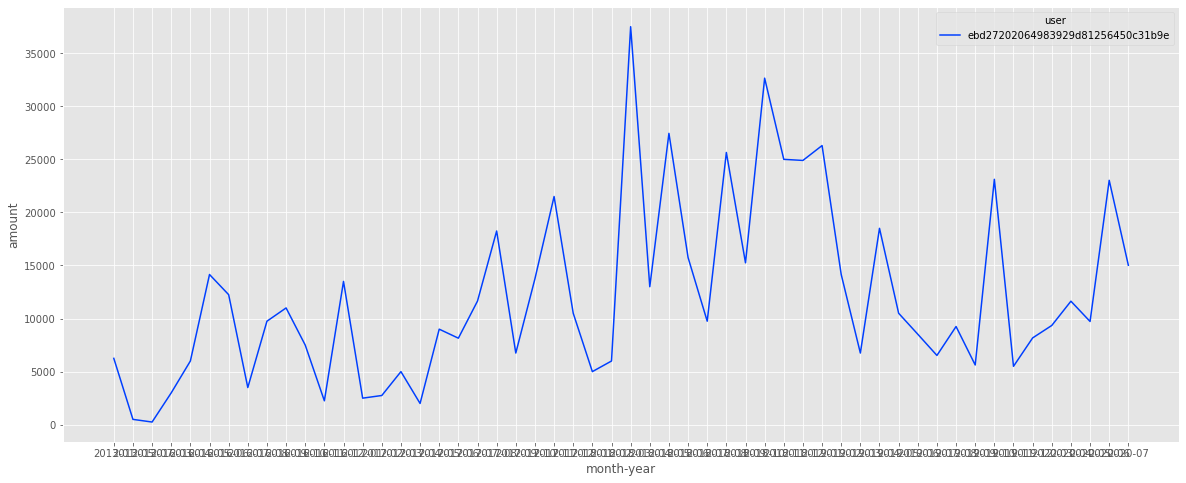

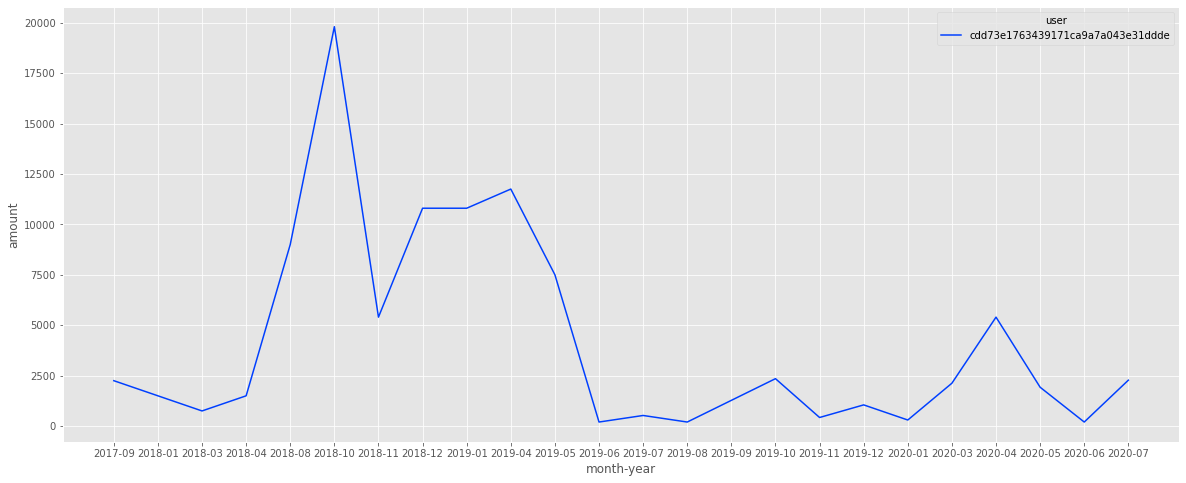

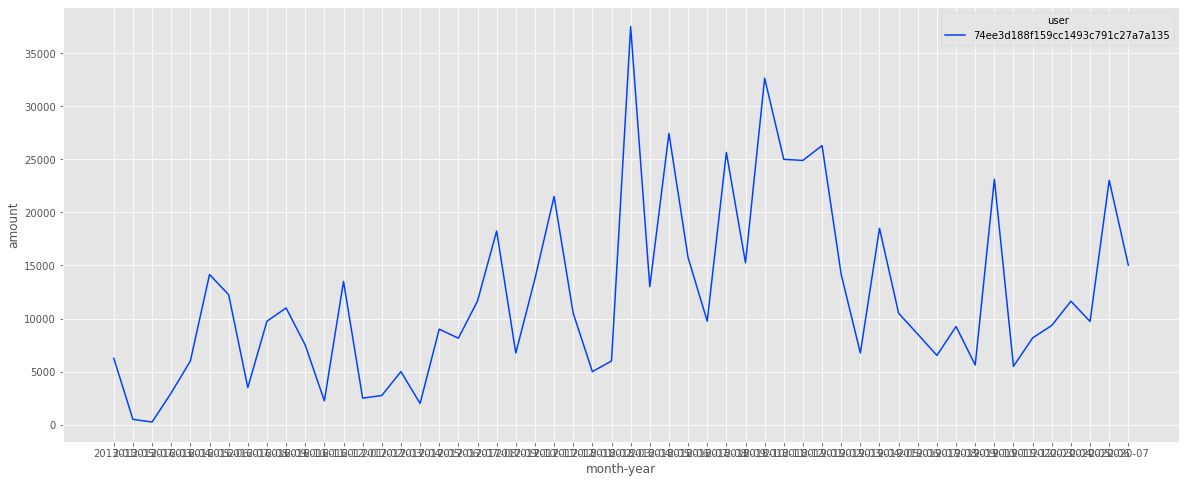

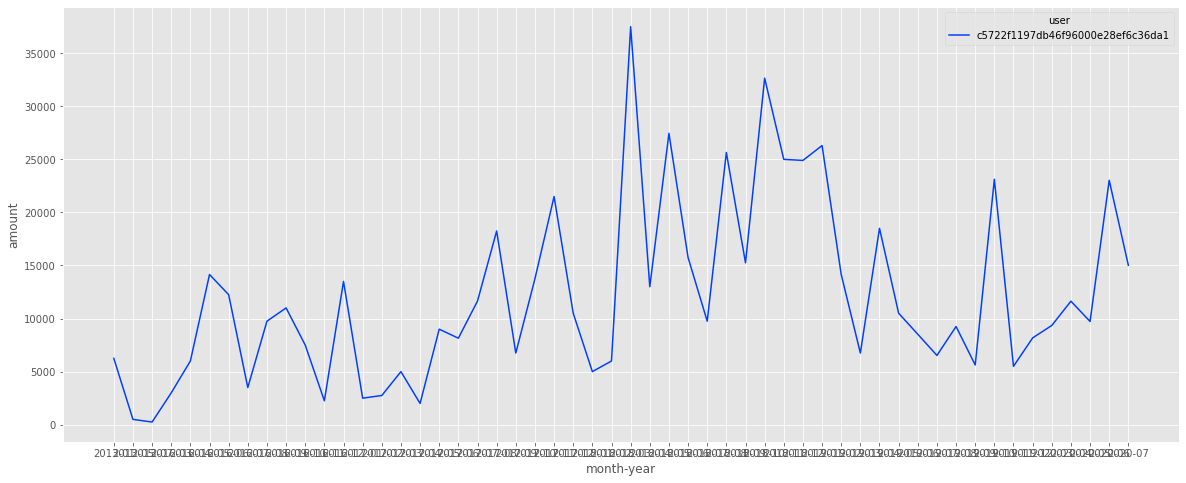

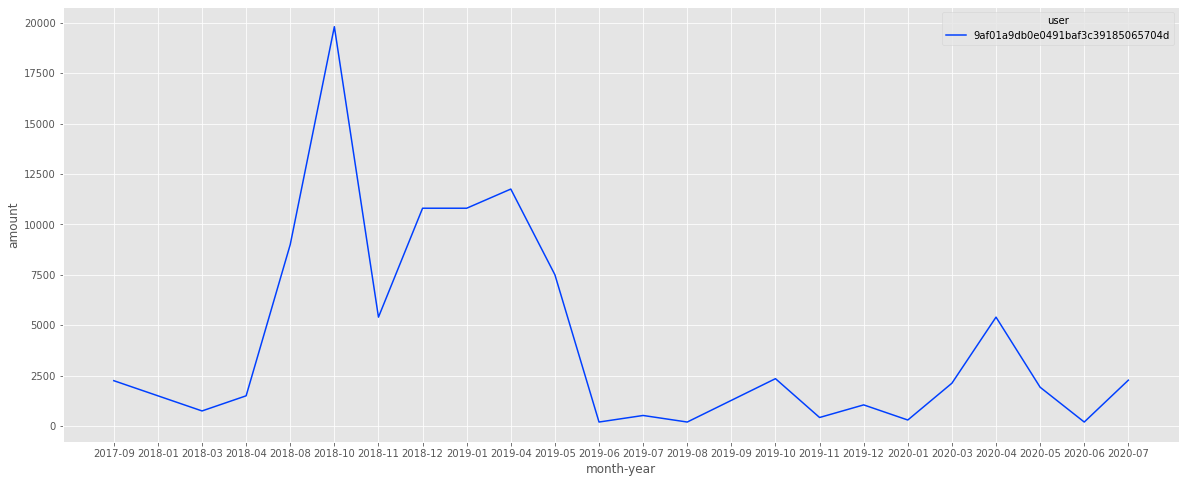

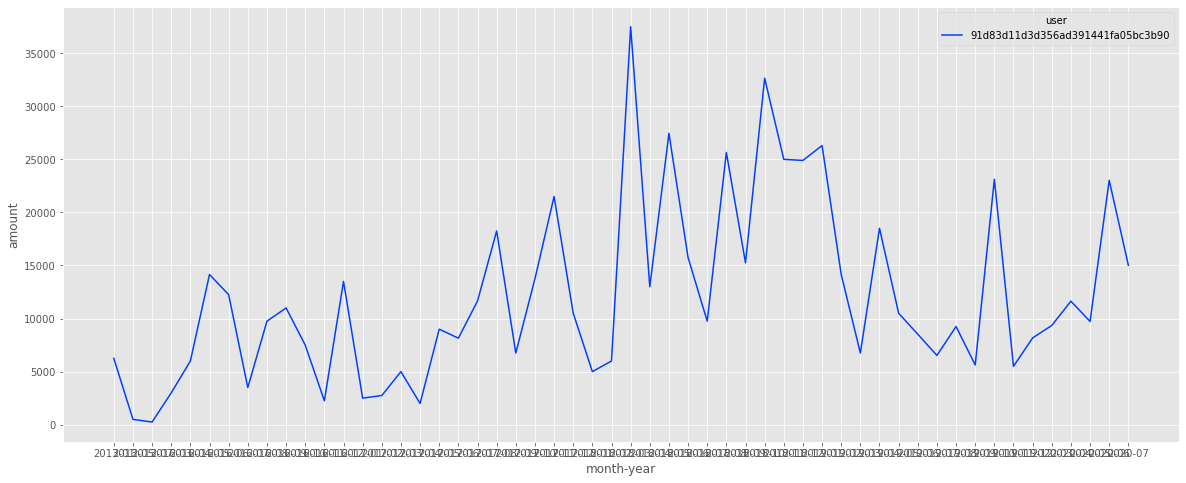

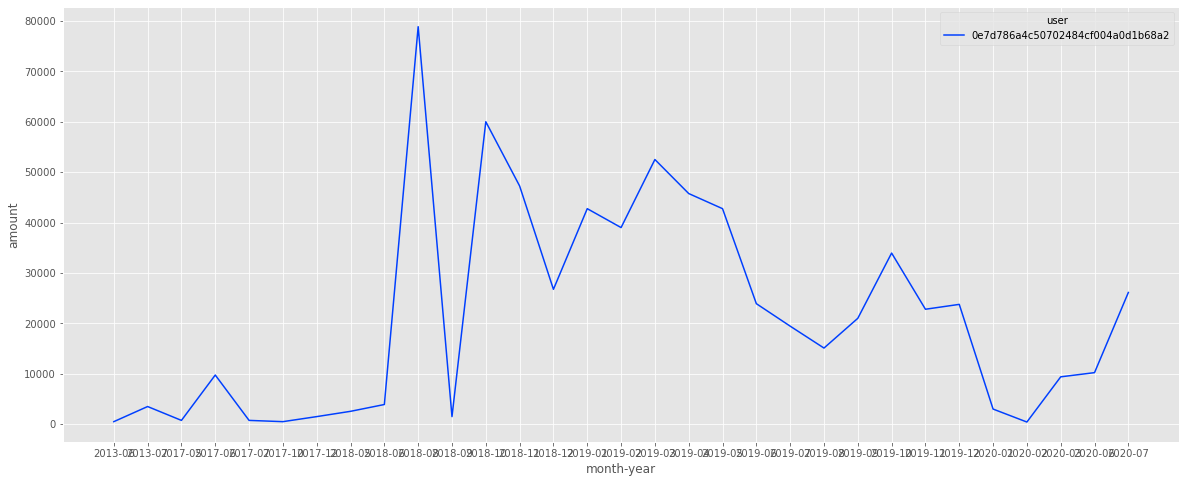

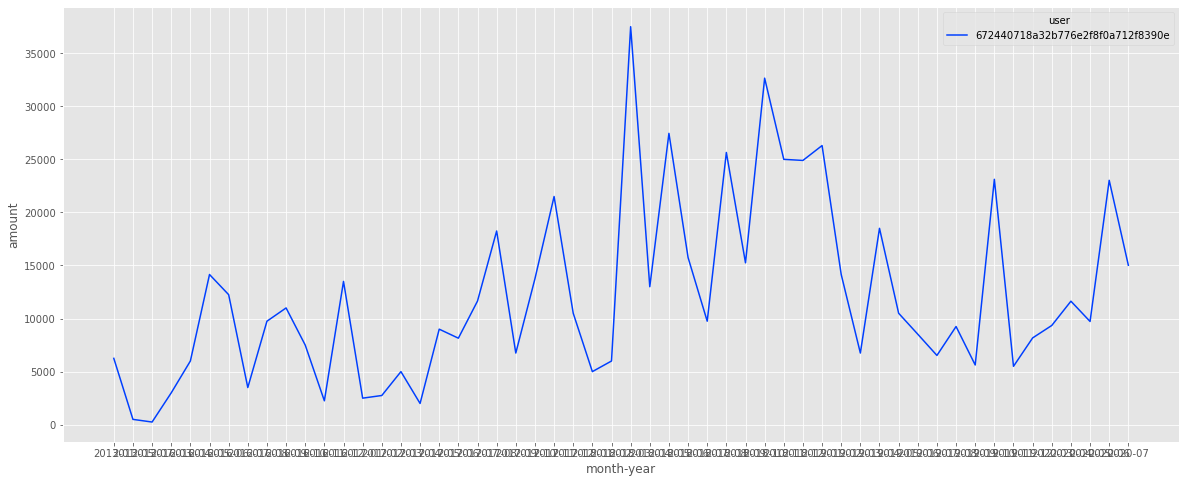

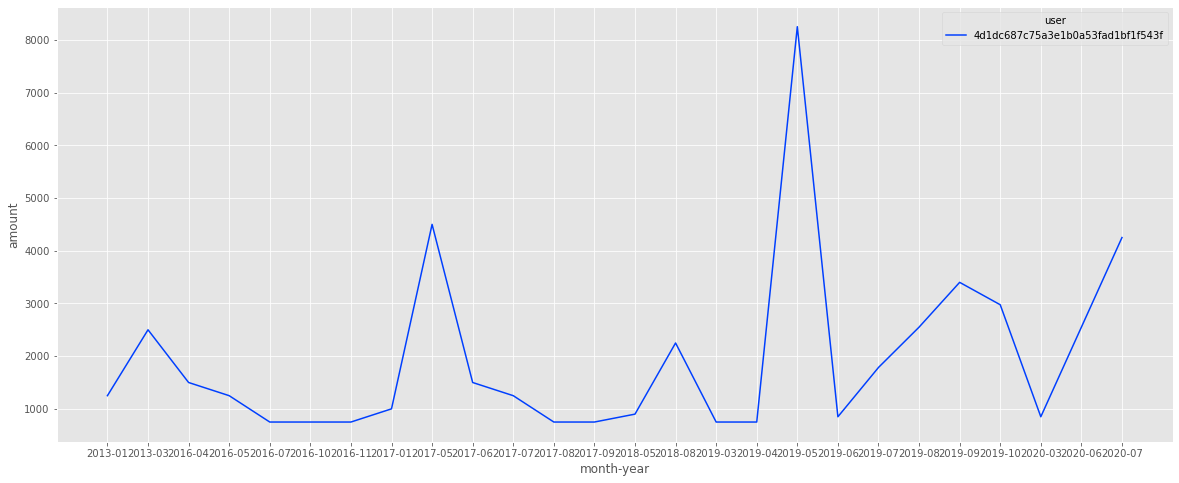

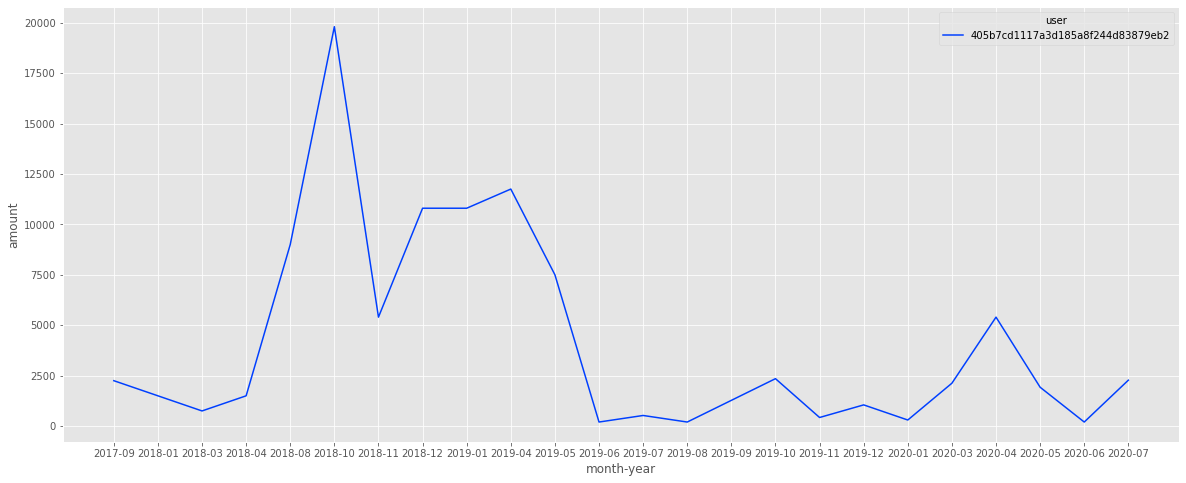

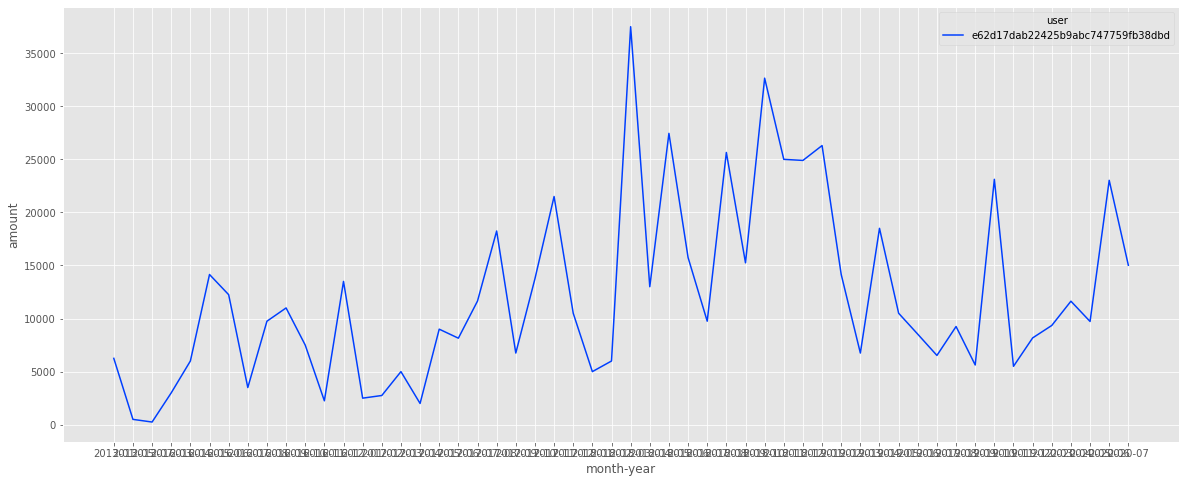

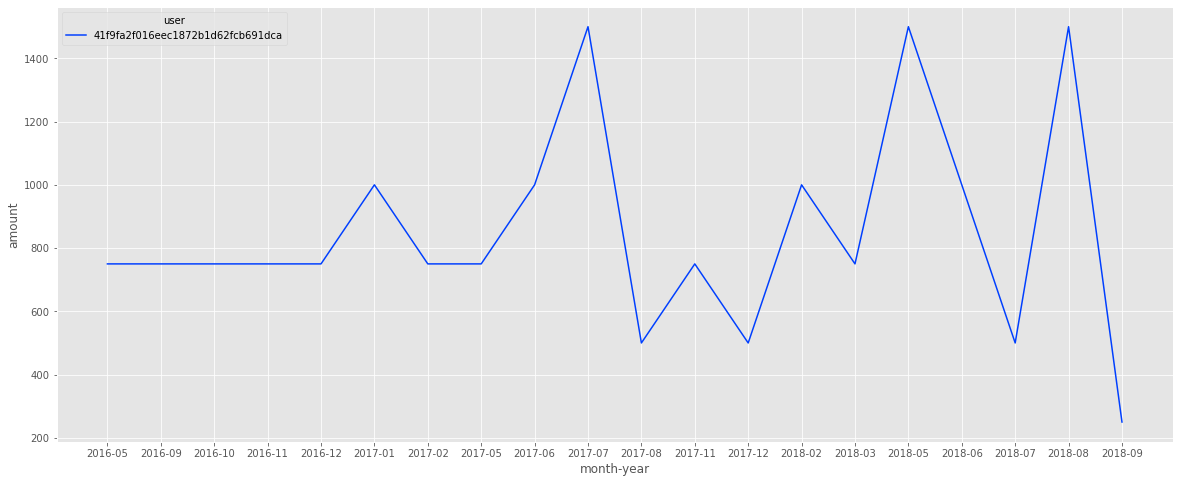

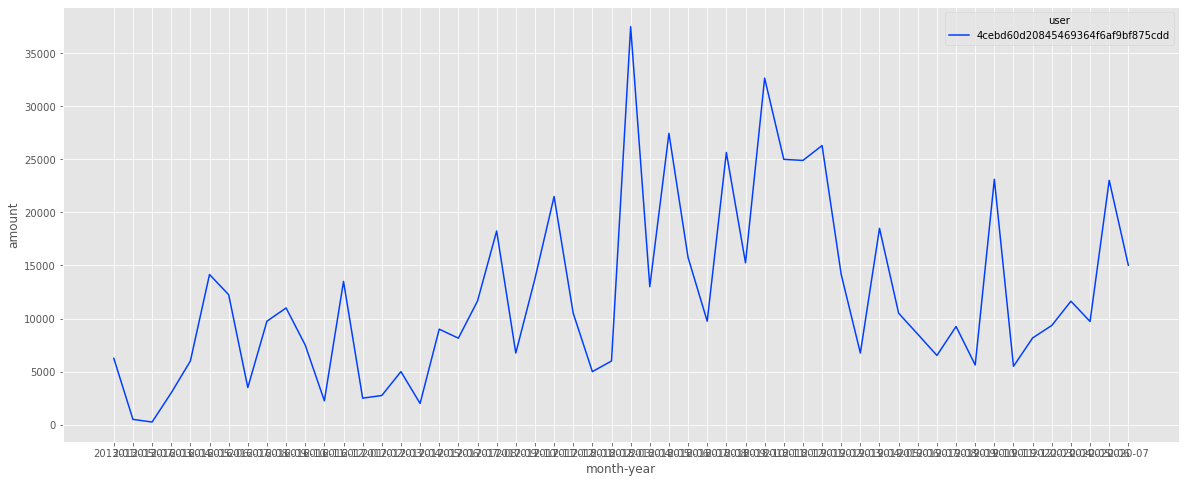

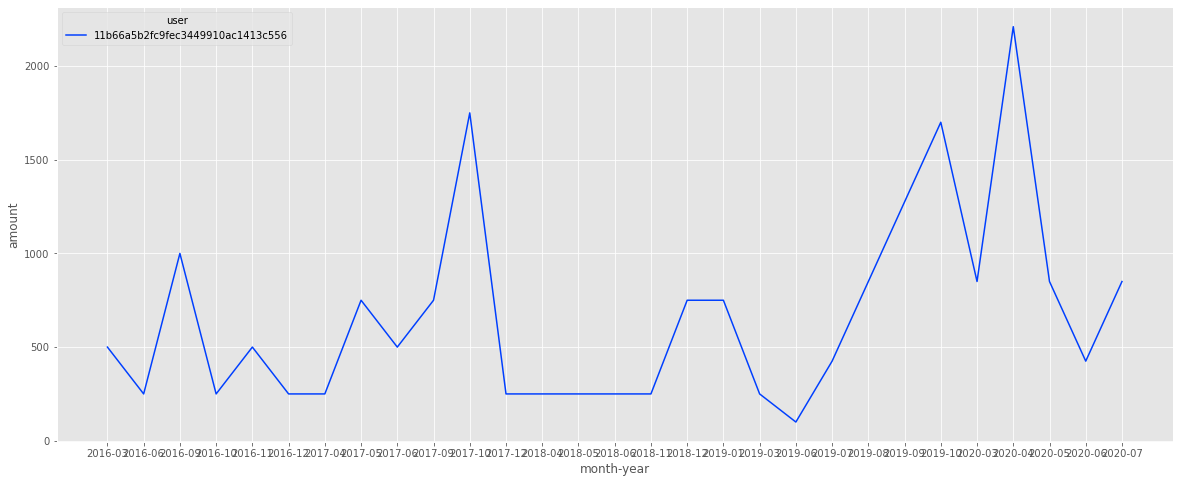

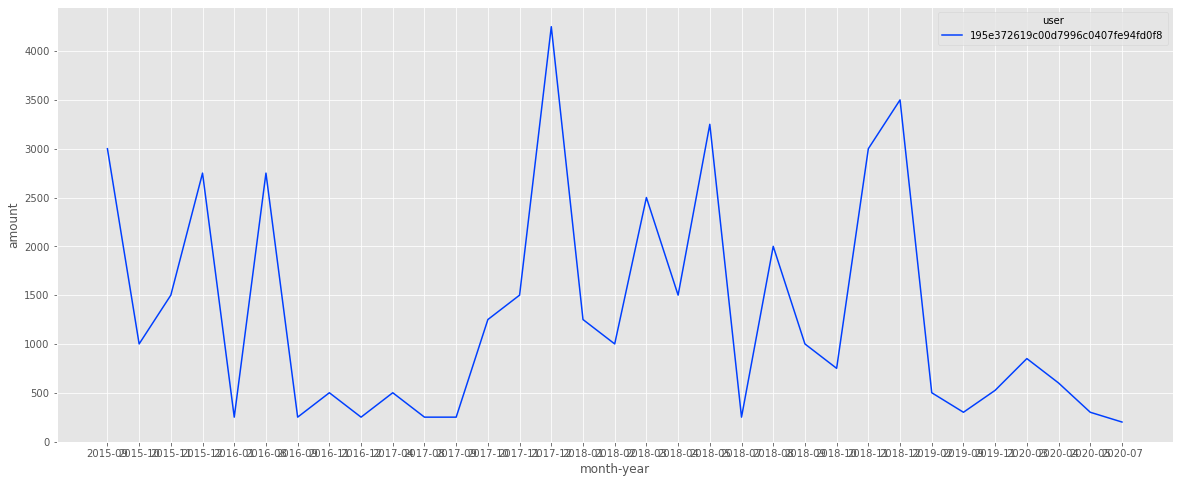

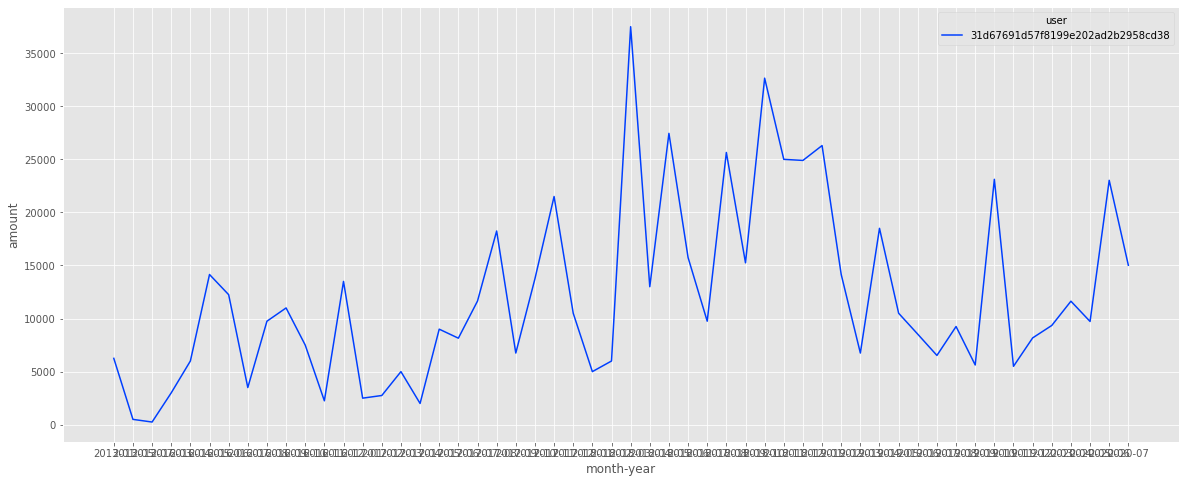

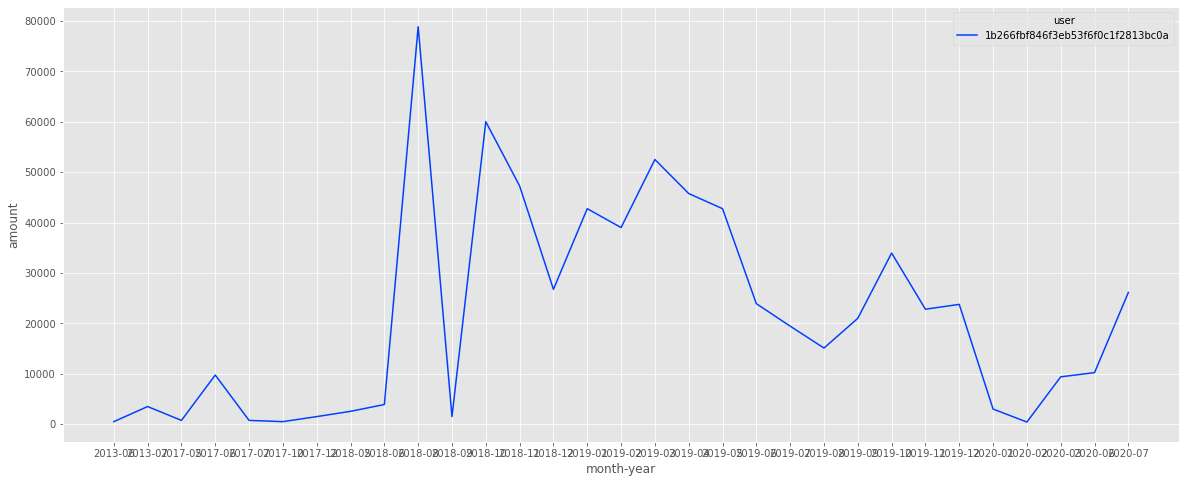

In [178]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

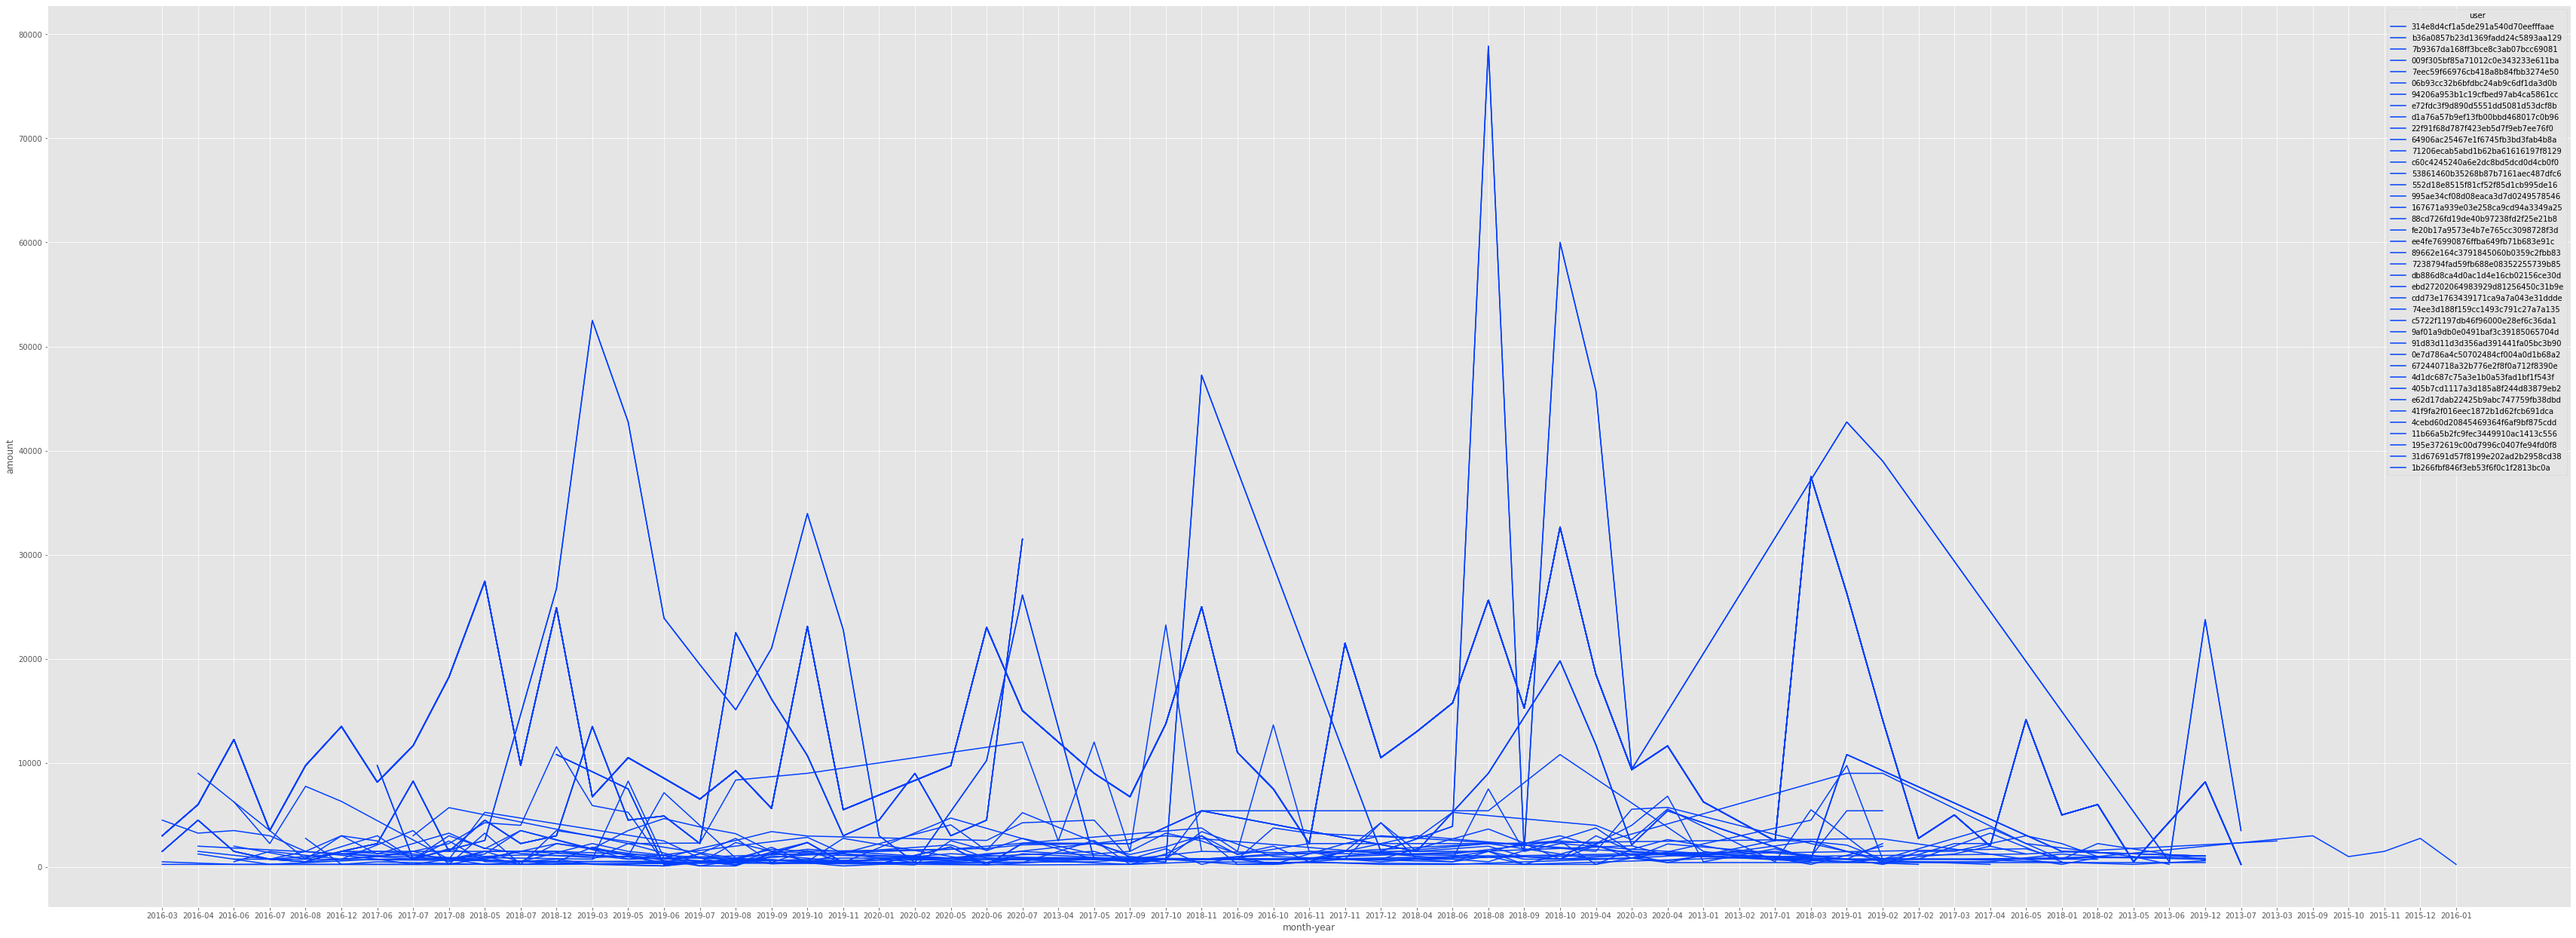

In [179]:
plt.figure(figsize=(60,22))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

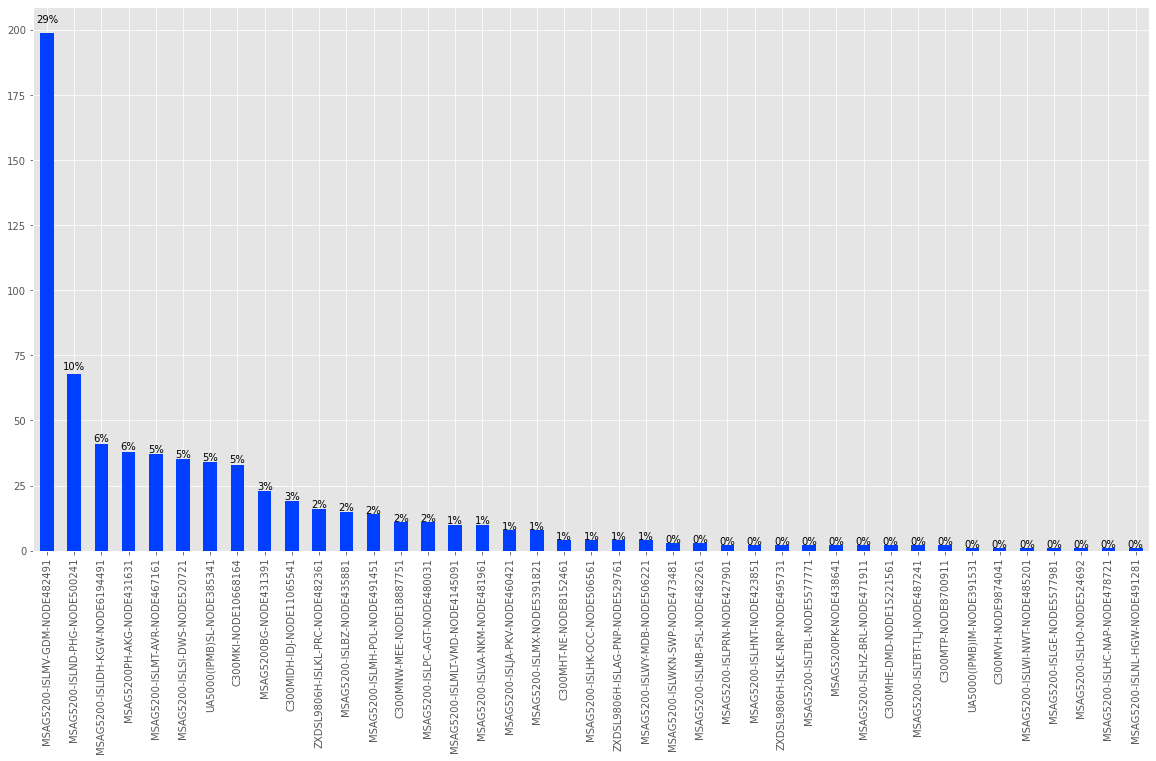

In [110]:
ax =cluster_0["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

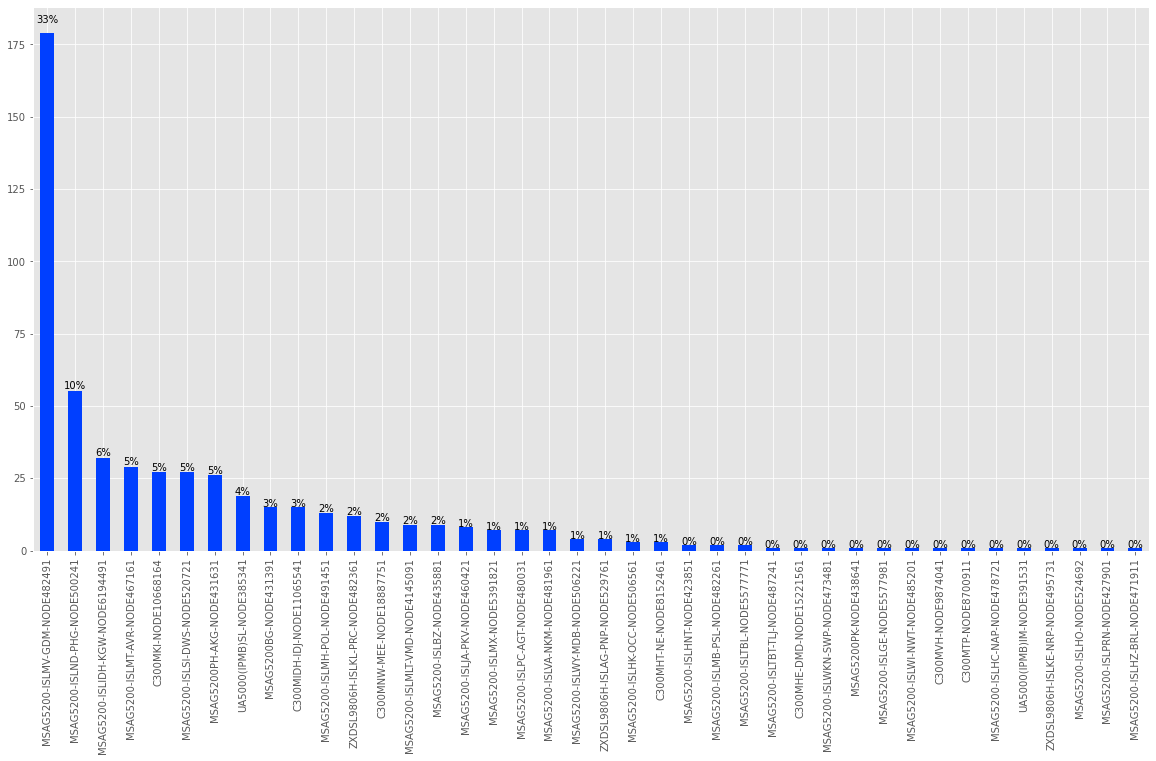

In [111]:
ax =cluster_0_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

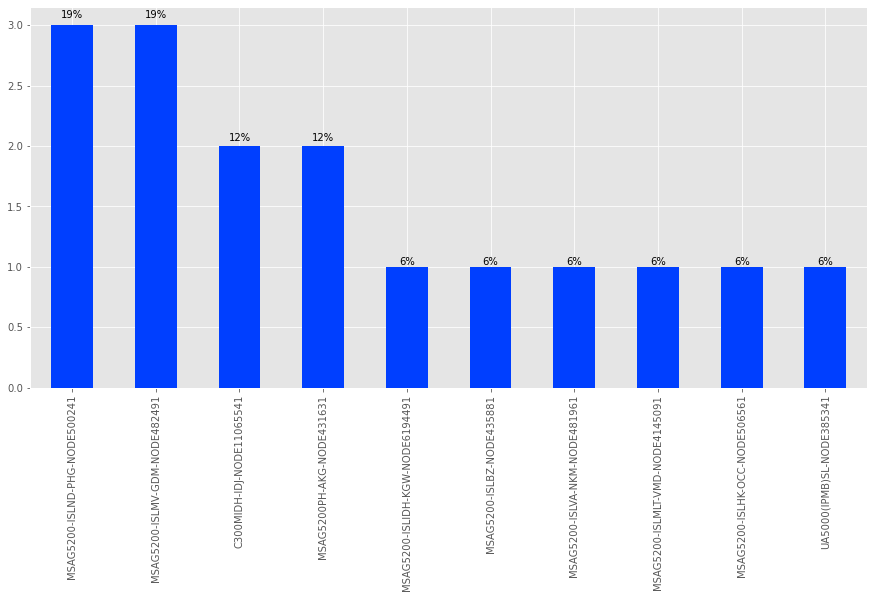

In [113]:
ax =cluster_0_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

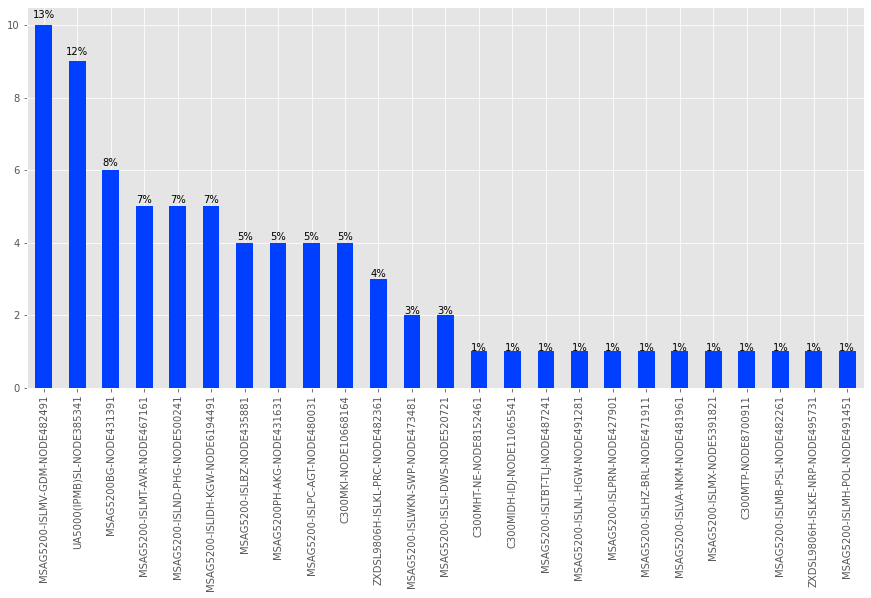

In [114]:
ax =cluster_0_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### Peo TV Usage among locations

[Text(0, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(1, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(2, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(3, 0, 'MSAG5200PK-NODE438641'),
 Text(4, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(5, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(6, 0, 'C300MKI-NODE10668164'),
 Text(7, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(8, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(9, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(10, 0, 'MSAG5200-ISLHO-NODE524692'),
 Text(11, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(12, 0, 'MSAG5200-ISLJA-PKV-NODE460421'),
 Text(13, 0, 'MSAG5200-ISLPRN-NODE427901'),
 Text(14, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(15, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(16, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(17, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(18, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(19, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(20, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(21, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(22

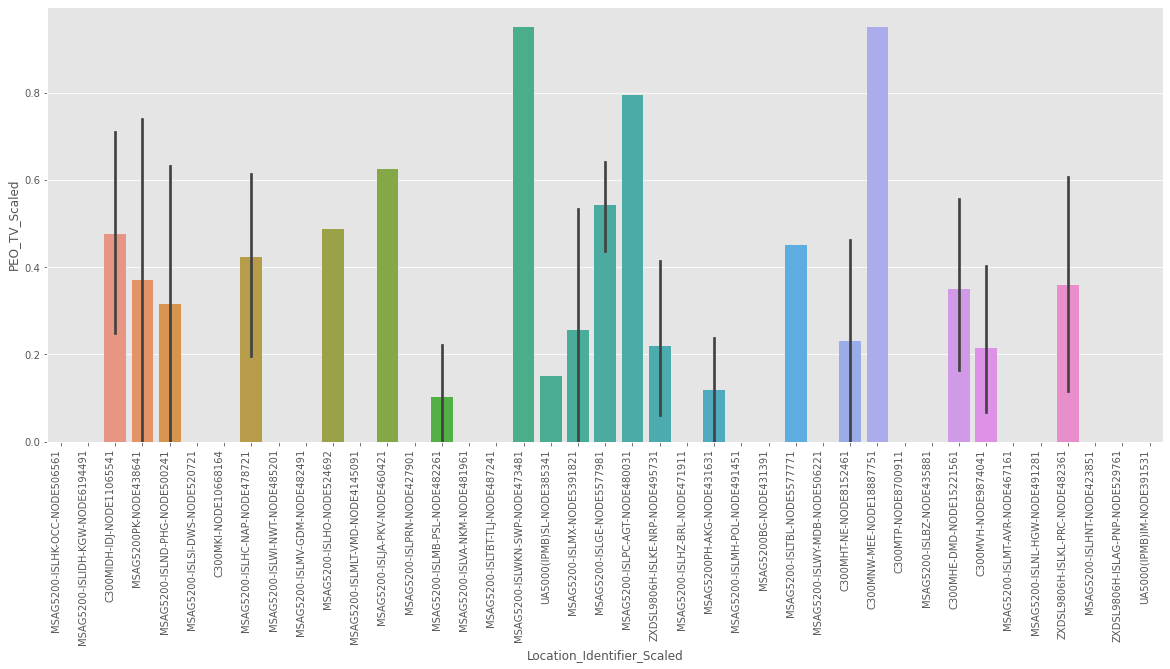

In [198]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_0[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [199]:
location_arr = cluster_0["Location_Identifier"].unique()

<ipython-input-222-e93baec5802f>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



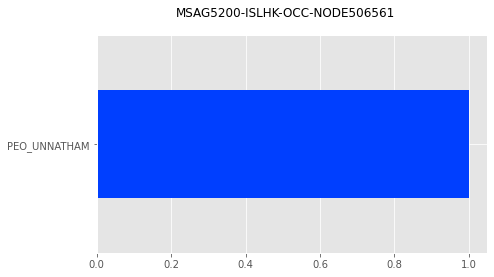

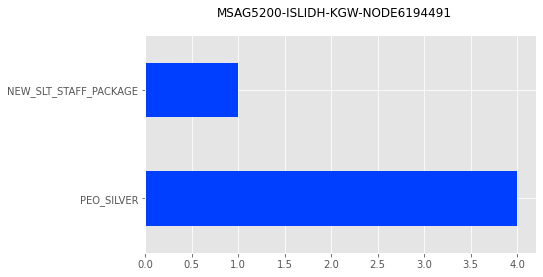

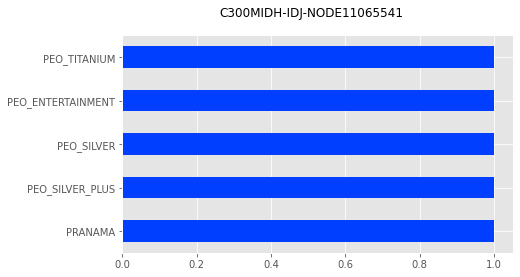

<Figure size 504x288 with 0 Axes>

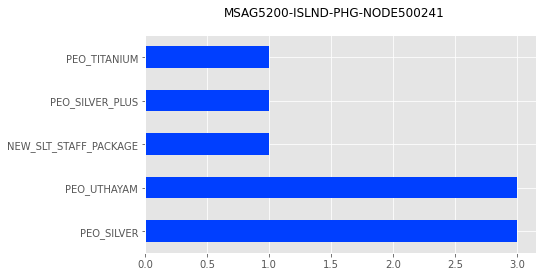

<Figure size 504x288 with 0 Axes>

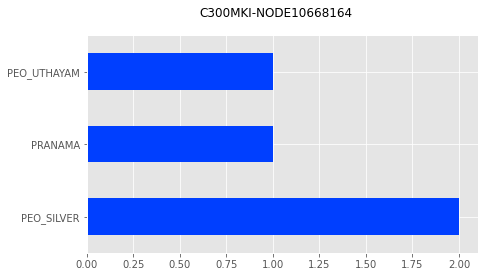

<Figure size 504x288 with 0 Axes>

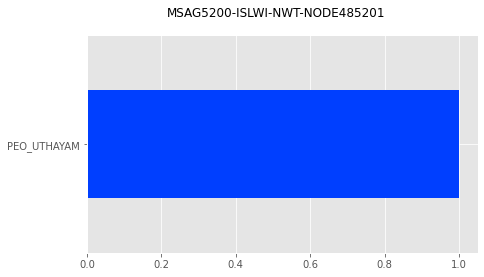

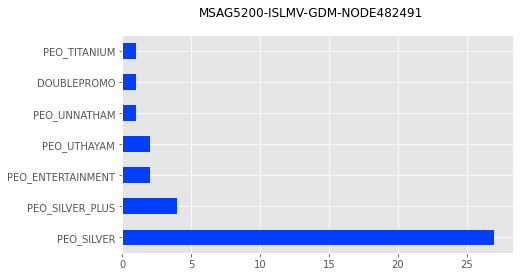

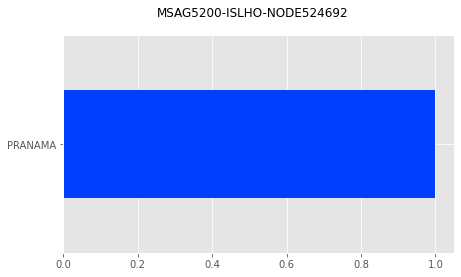

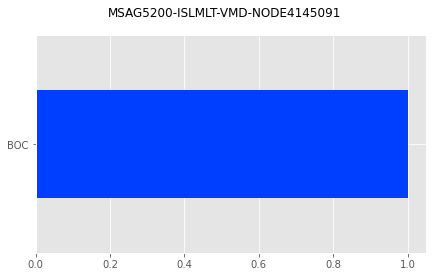

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

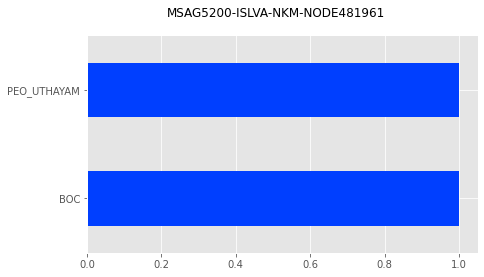

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

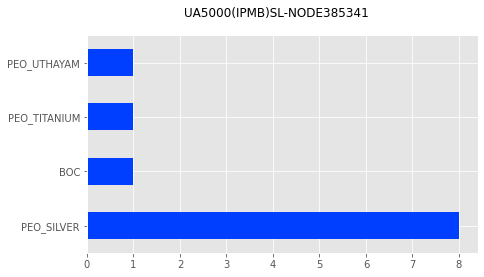

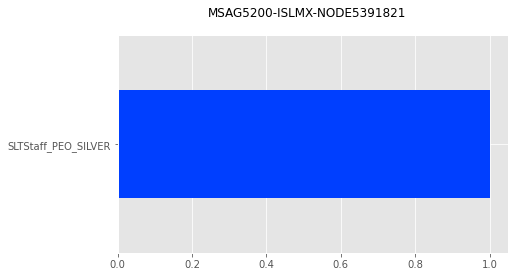

<Figure size 504x288 with 0 Axes>

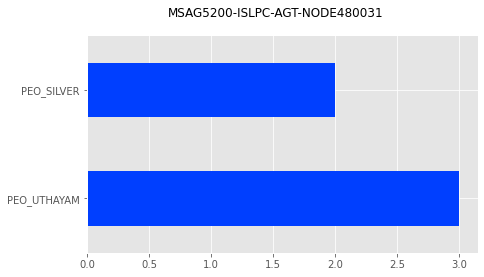

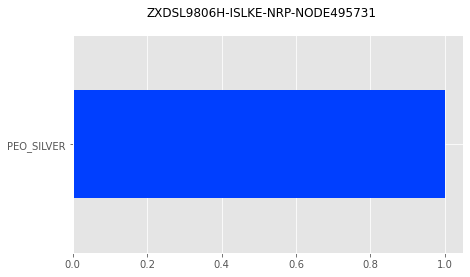

<Figure size 504x288 with 0 Axes>

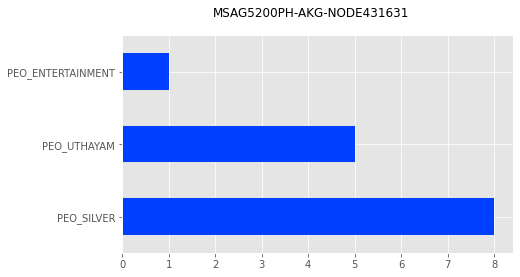

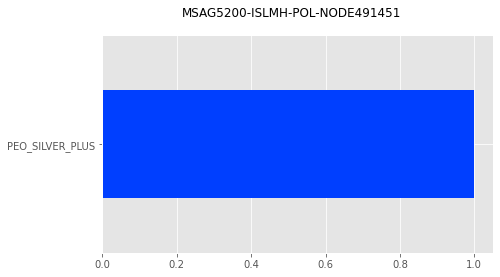

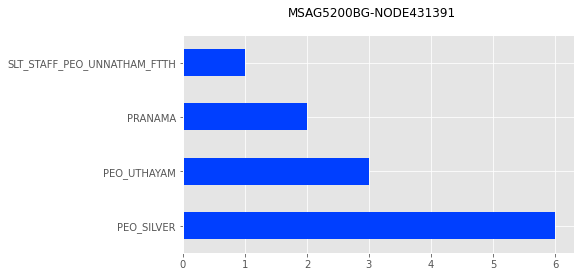

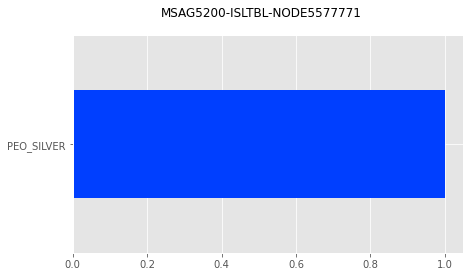

<Figure size 504x288 with 0 Axes>

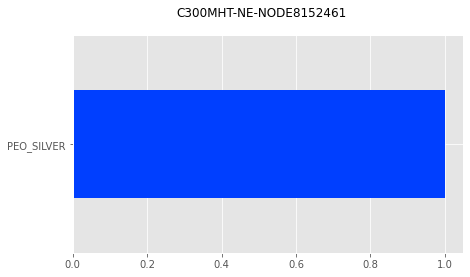

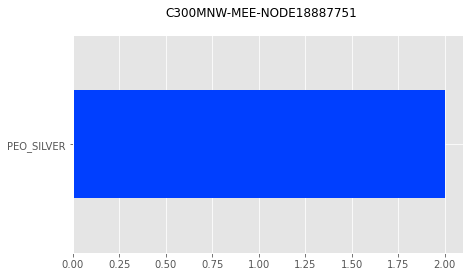

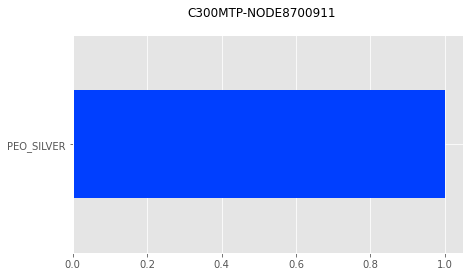

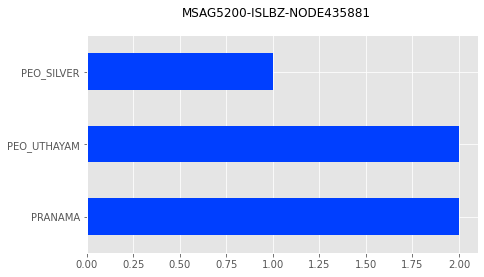

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

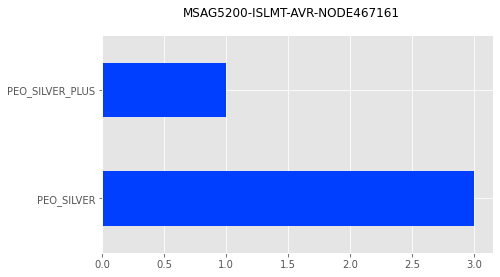

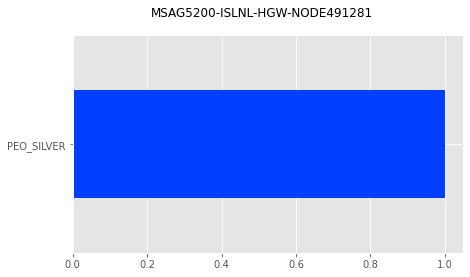

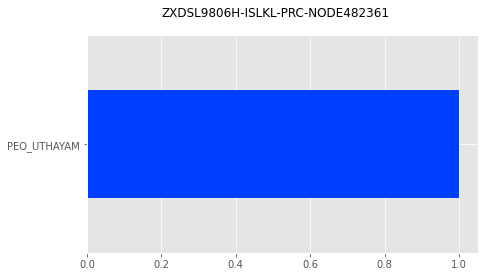

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [222]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(7,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-229-70918ae6f1e2>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 504x288 with 0 Axes>

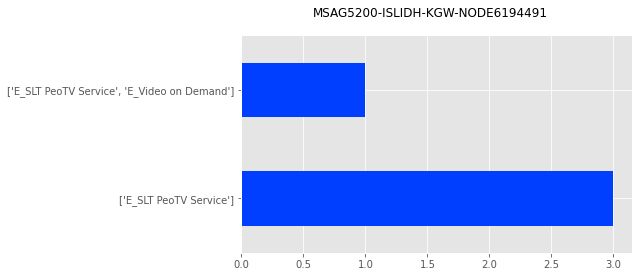

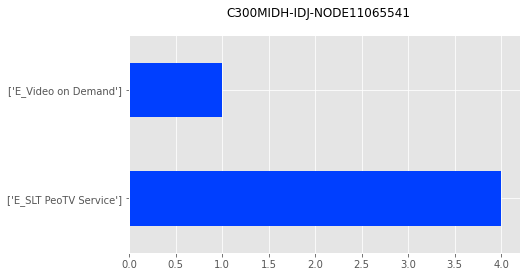

<Figure size 504x288 with 0 Axes>

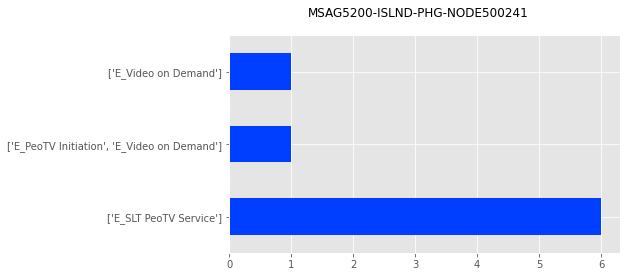

<Figure size 504x288 with 0 Axes>

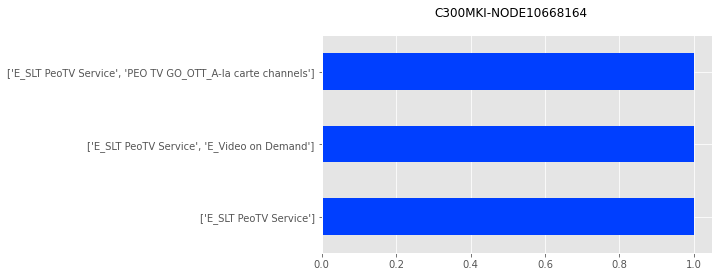

<Figure size 504x288 with 0 Axes>

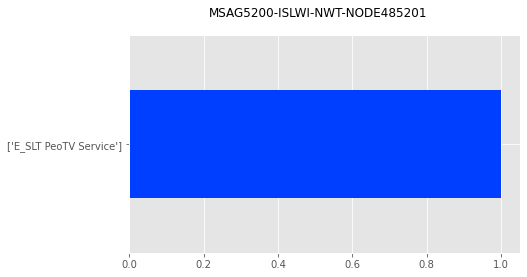

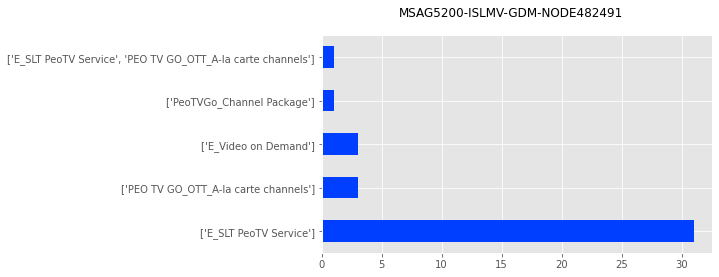

<Figure size 504x288 with 0 Axes>

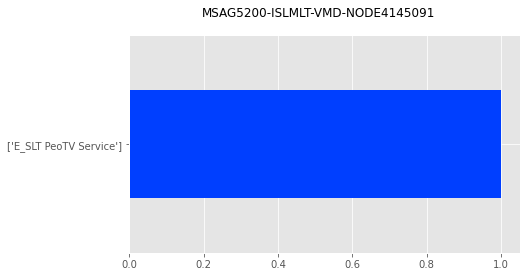

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

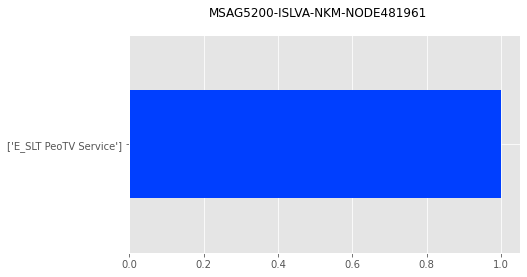

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

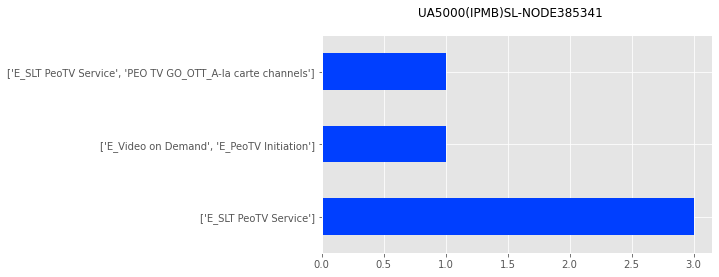

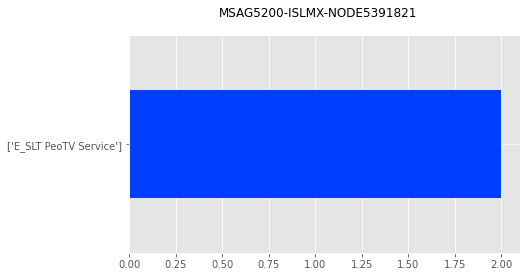

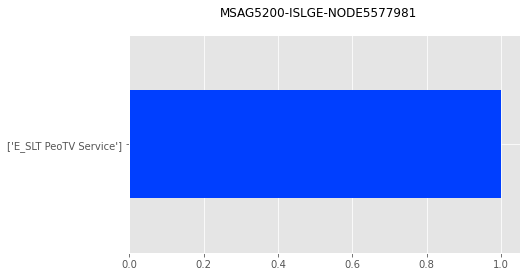

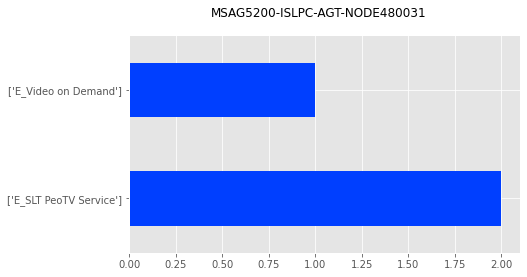

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

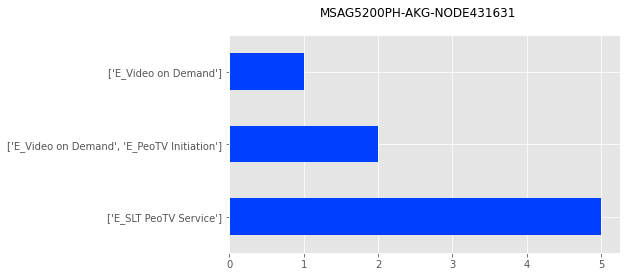

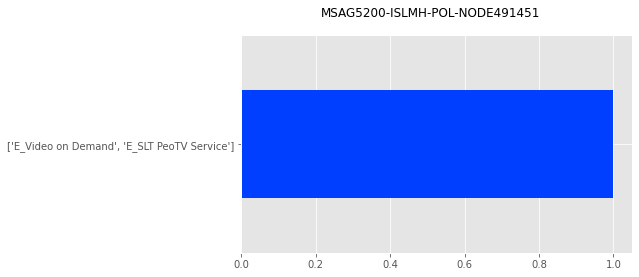

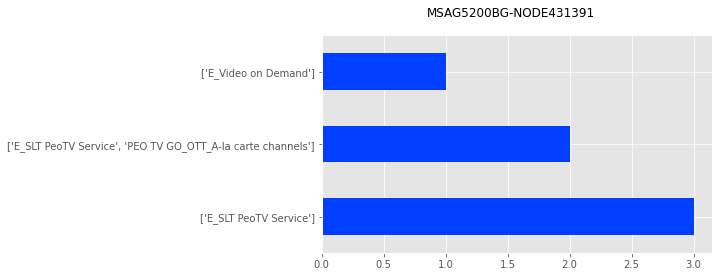

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

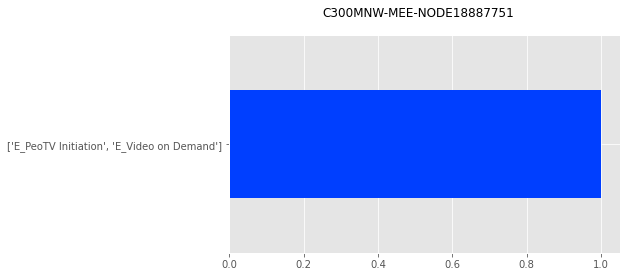

<Figure size 504x288 with 0 Axes>

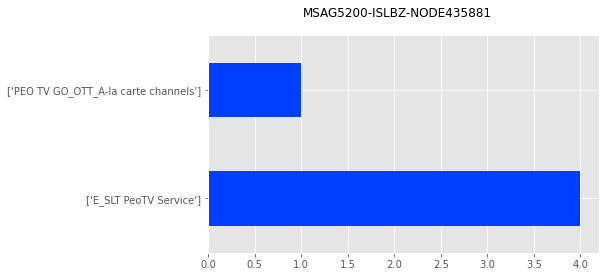

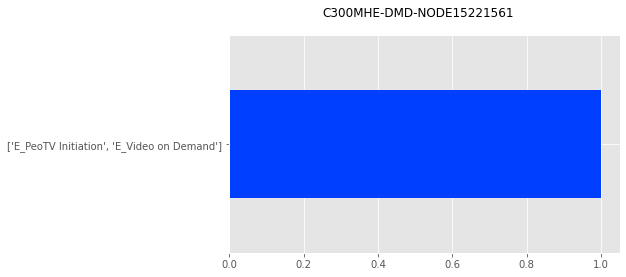

<Figure size 504x288 with 0 Axes>

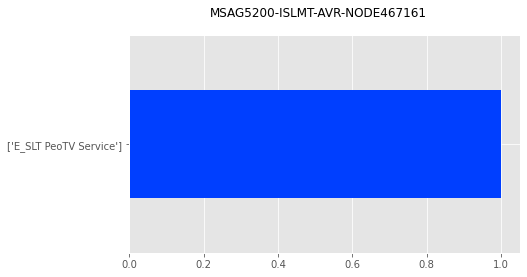

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [229]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(7,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-230-880c3ba322be>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 504x288 with 0 Axes>

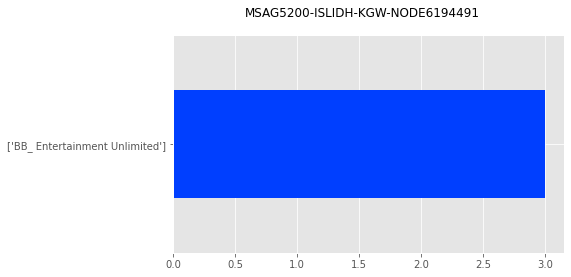

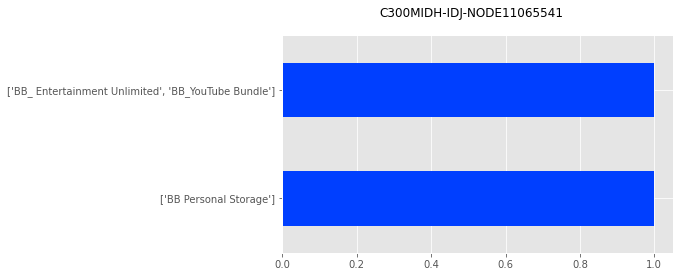

<Figure size 504x288 with 0 Axes>

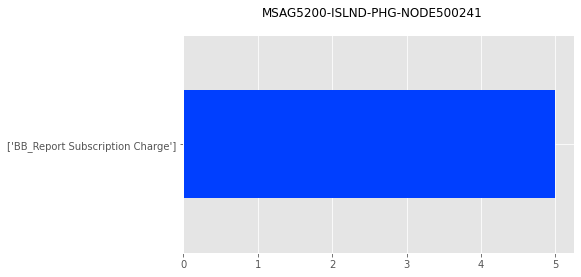

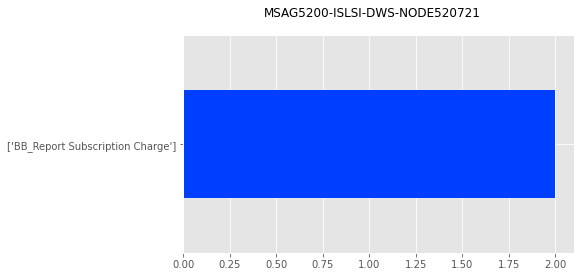

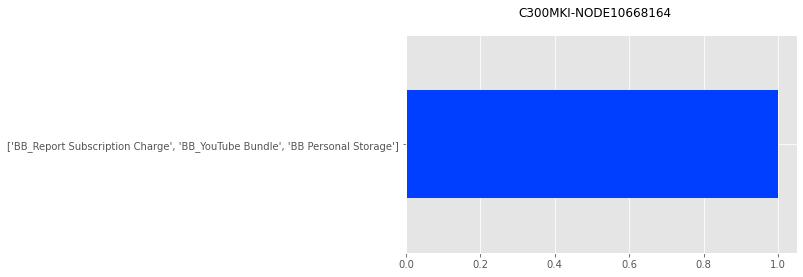

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

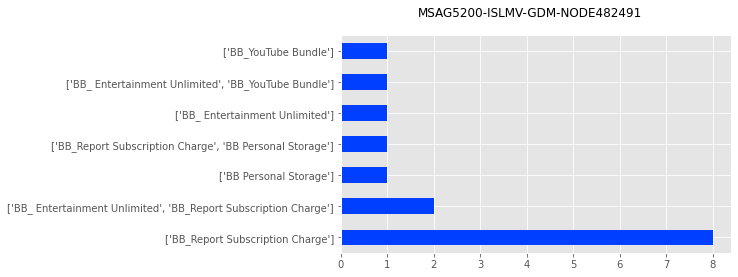

<Figure size 504x288 with 0 Axes>

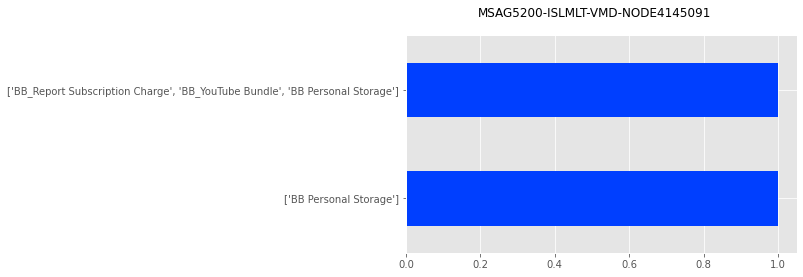

<Figure size 504x288 with 0 Axes>

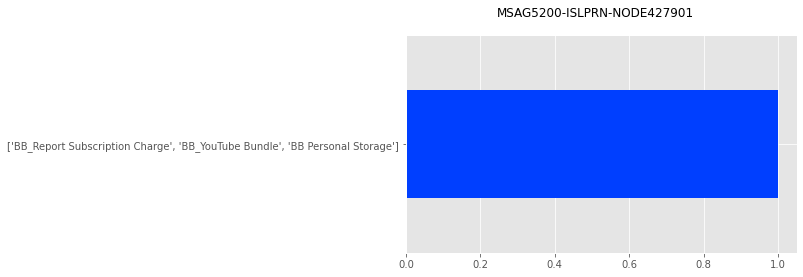

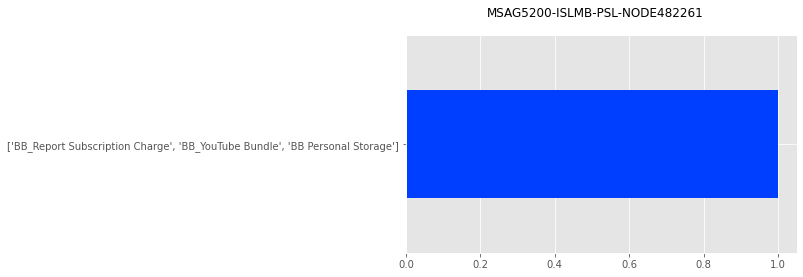

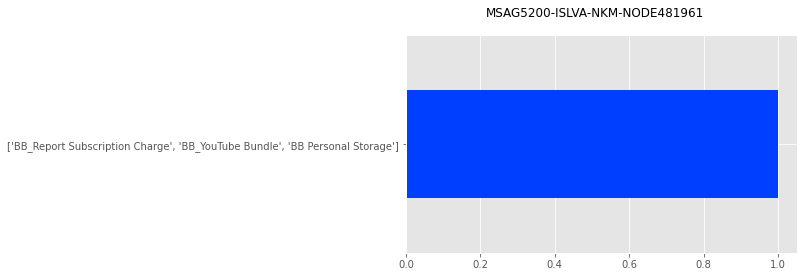

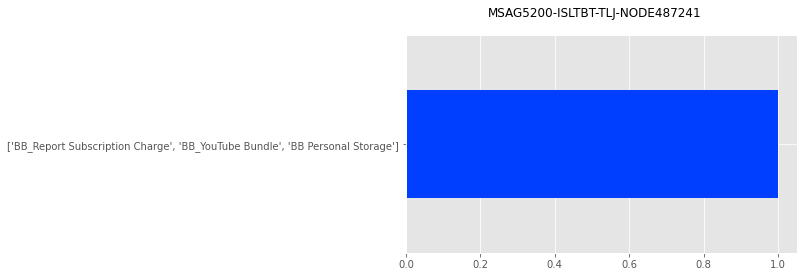

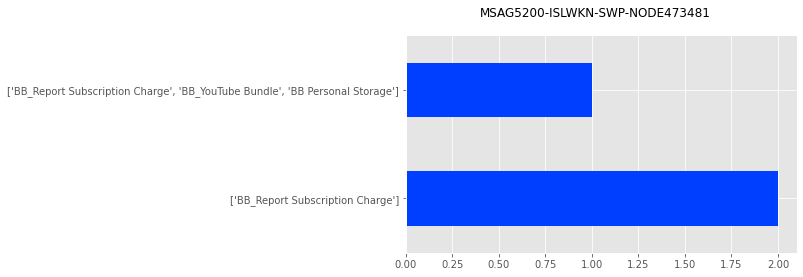

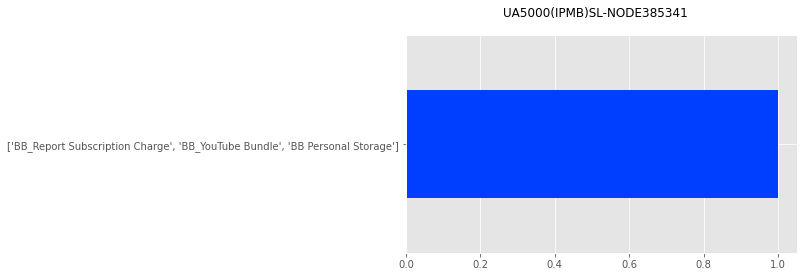

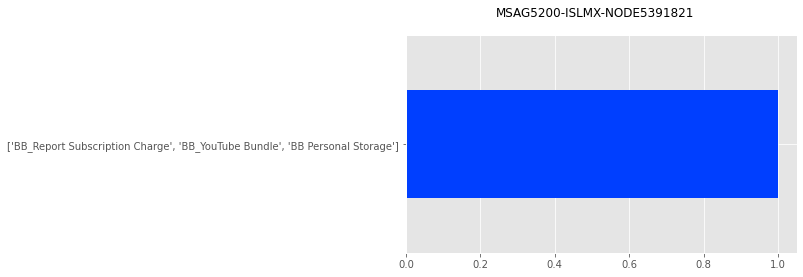

<Figure size 504x288 with 0 Axes>

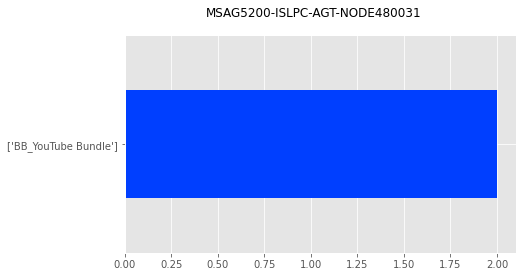

<Figure size 504x288 with 0 Axes>

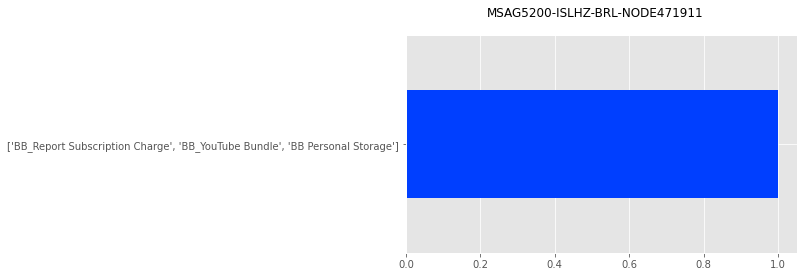

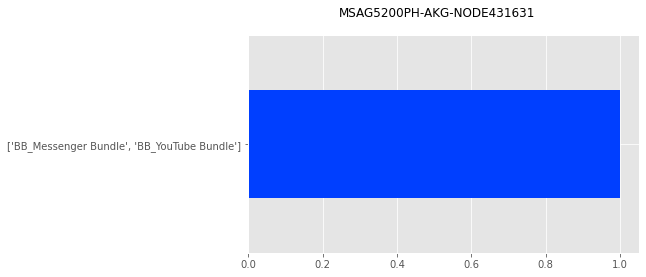

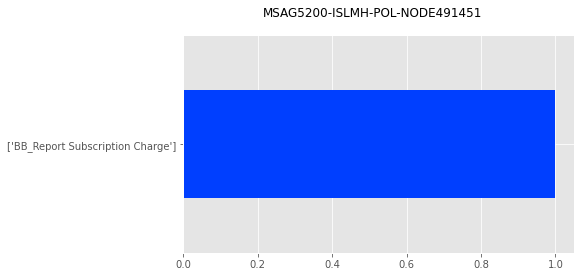

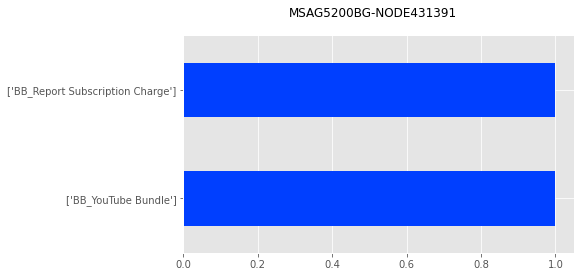

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

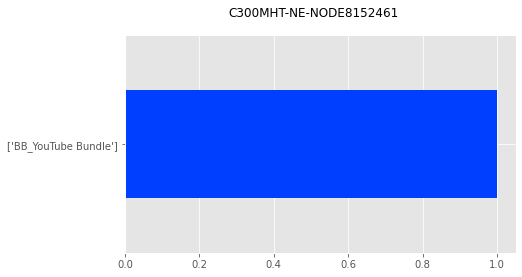

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

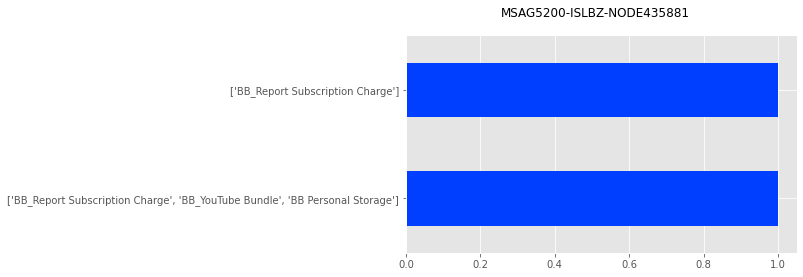

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

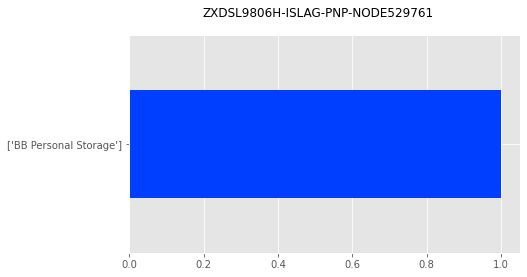

<Figure size 504x288 with 0 Axes>

In [230]:
for loc in location_arr:
    user_loc_df = cluster_0[((cluster_0["Location_Identifier"]==loc) & (cluster_0["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(7,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

### Socio-economic factors

In [115]:
cluster_0["Having_Insurance"].value_counts()

NO_INFO    591
YES         86
Name: Having_Insurance, dtype: int64

#### Having Senior citizens

In [116]:
cluster_0["Having_Senior_Citizen"].value_counts()

NO_INFO    577
YES        100
Name: Having_Senior_Citizen, dtype: int64

#### Having a family member abroad

In [117]:
cluster_0["Having_Family_Member_Abroad"].value_counts()

YES        665
NO_INFO     12
Name: Having_Family_Member_Abroad, dtype: int64

#### Having a working professional

In [118]:
cluster_0["Having_Working_Professionals"].value_counts()

NO_INFO    607
YES         70
Name: Having_Working_Professionals, dtype: int64

#### Having Teenagers Students

In [119]:
cluster_0["Having_Teenagers_Students"].value_counts()

NO_INFO    618
YES         59
Name: Having_Teenagers_Students, dtype: int64

#### Having a Tamil customer

In [120]:
cluster_0["Tamil_Customer"].value_counts()

NO_INFO    651
YES         26
Name: Tamil_Customer, dtype: int64

#### Having Kids at Home

In [121]:
cluster_0["Having_Kids_at_Home"].value_counts()

NO_INFO    643
YES         34
Name: Having_Kids_at_Home, dtype: int64

## ToDO
- Further Analyze Socio Economic factors

## Cluster 0- Findings

# Inter-clusters Analysis

## Voice Usage

In [86]:
voice_usage = user_profile[["Cluster","VOICE_Categorical"]].value_counts().sort_index()
voice_usage

Cluster  VOICE_Categorical
0        HIGH                   66
         LOW                  1170
         MEDIUM                485
1        HIGH                   16
         LOW                   324
         MEDIUM                221
2        HIGH                   37
         LOW                   662
         MEDIUM                326
dtype: int64

<AxesSubplot:ylabel='None'>

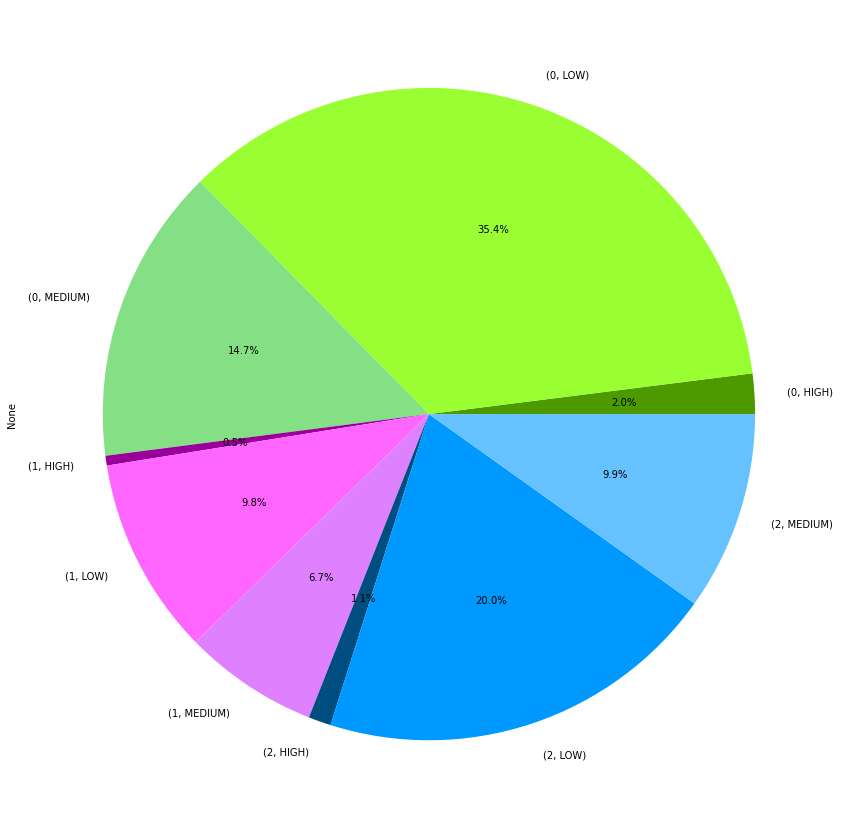

In [87]:
voice_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#99ff33","#85e085","#990099","#ff66ff","#df80ff","#004d80","#0099ff","#66c2ff"])

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

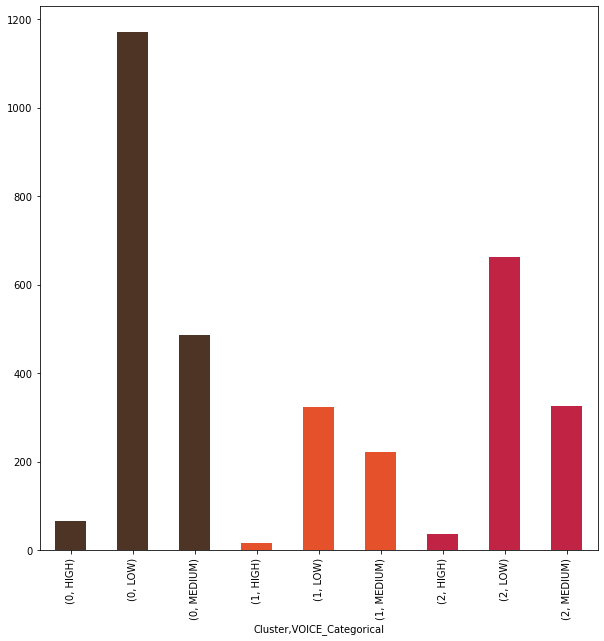

In [126]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345"]
voice_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,VOICE_Categorical'>

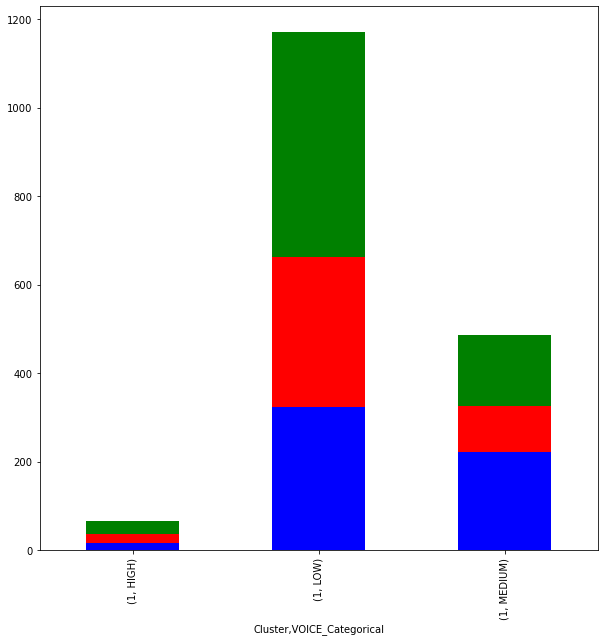

In [89]:
ax = voice_usage[:3].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
voice_usage[6:9].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
voice_usage[3:6].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
# Green - 0
# Red - 1
# Blue - 2

## IDD Usage

In [90]:
idd_usage = user_profile[["Cluster","IDD_Overall_Categorical"]].value_counts().sort_index()
idd_usage

Cluster  IDD_Overall_Categorical
0        HIGH                         37
         LOW                         592
         MEDIUM                       38
         NO                         1054
1        HIGH                         15
         LOW                         204
         MEDIUM                        9
         NO                          333
2        HIGH                         13
         LOW                         352
         MEDIUM                       35
         NO                          625
dtype: int64

<AxesSubplot:ylabel='None'>

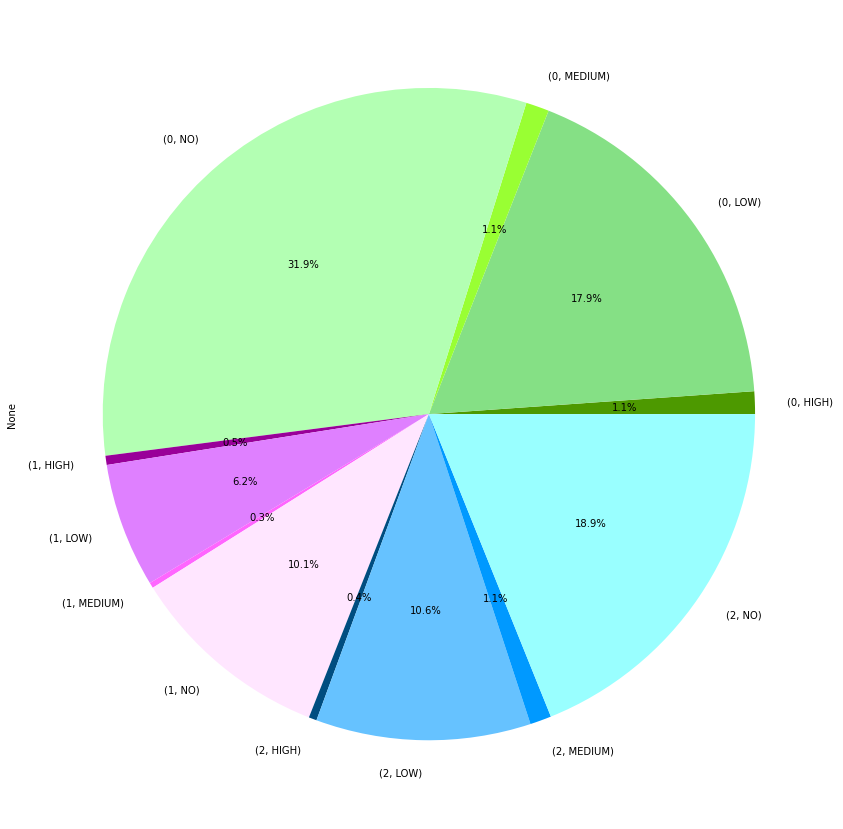

In [91]:
idd_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#4d9900","#85e085","#99ff33","#b3ffb3","#990099","#df80ff","#ff66ff","#ffe6ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

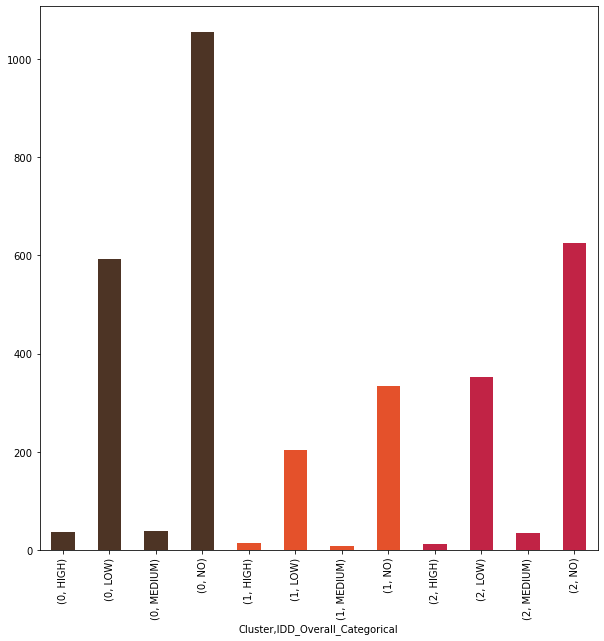

In [125]:
colors = ['#4D3425','#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
idd_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

<AxesSubplot:xlabel='Cluster,IDD_Overall_Categorical'>

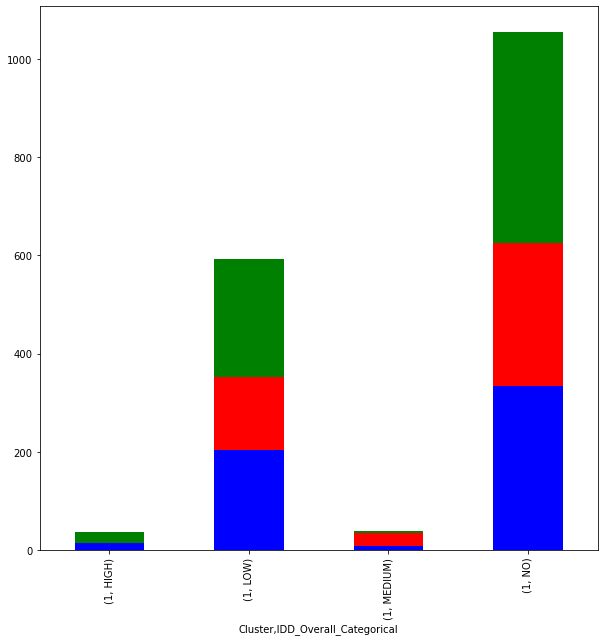

In [93]:
ax = idd_usage[:4].plot(stacked=True, kind="bar", figsize=(10,10), color="green")
idd_usage[8:12].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="red")
idd_usage[4:8].plot(stacked=True, kind="bar",ax=ax, figsize=(10,10), color="blue")
#  0 - Blue , 1 - Red , 2- Green

## BraodBand Usage analysis

In [95]:
bb_usage = user_profile[["Cluster","BB_Categorical"]].value_counts().sort_index()
bb_usage

Cluster  BB_Categorical
0        LOW                 55
         MEDIUM               3
         NO                1663
1        HIGH               101
         LOW                257
         MEDIUM             203
2        HIGH                95
         LOW                380
         MEDIUM             146
         NO                 404
dtype: int64

<AxesSubplot:ylabel='None'>

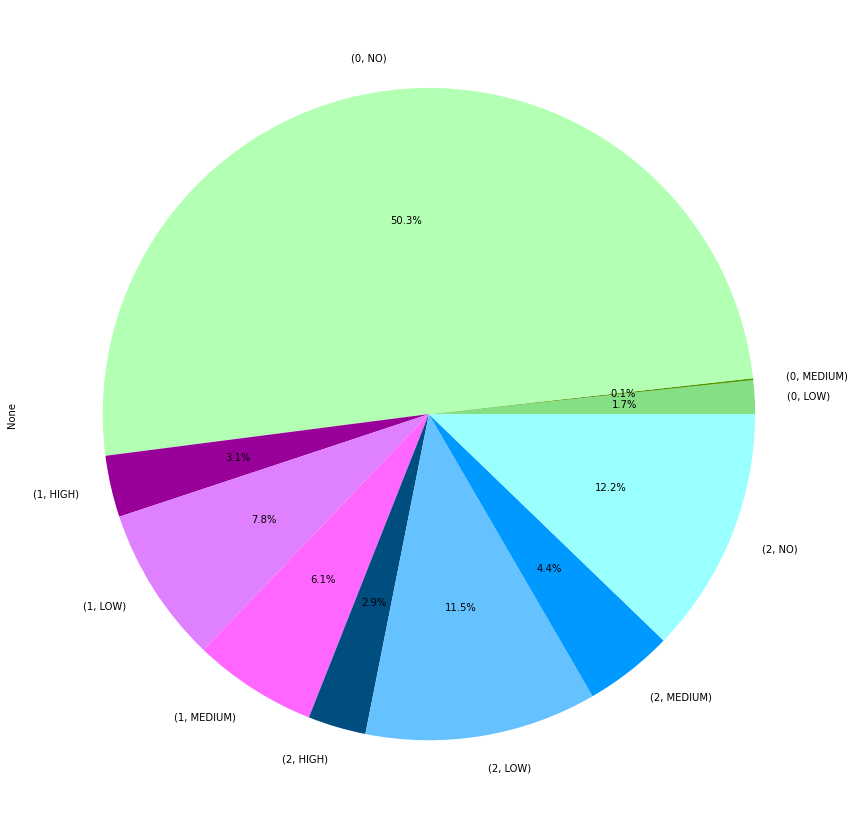

In [96]:
bb_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,BB_Categorical'>

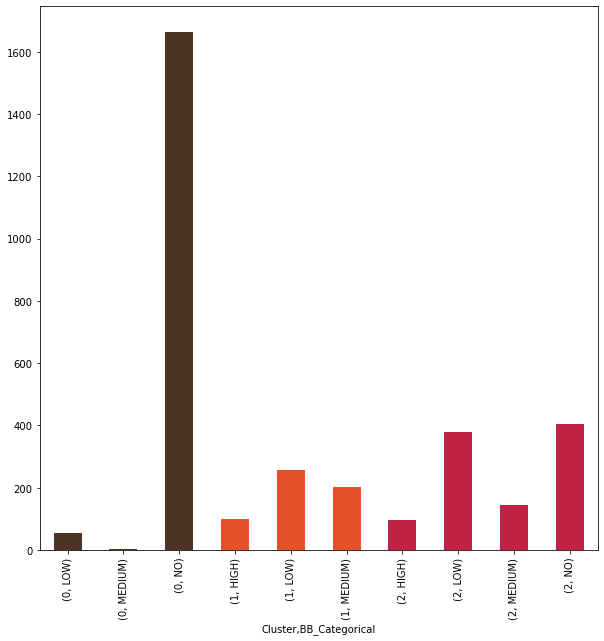

In [123]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
bb_usage.plot(stacked=True, kind="bar", figsize=(10,10), color=colors)

### Identifying factors for recommending Broadband for Cluster 0

In [98]:
# Cluster 2 --> 61% Broadband Users, first I'll Identify thier features and then compare with cluster 0

In [99]:
scaler = MinMaxScaler()
cluster_0["Location_Identifier"] = cluster_0["Location_Identifier"].astype("category")
cluster_0["Location_Identifier_Scaled"] = cluster_0["Location_Identifier"].cat.codes
cluster_0["Location_Identifier_Scaled"] = scaler.fit_transform(cluster_0["Location_Identifier_Scaled"].values.reshape(-1,1))

<ipython-input-99-4c4db900b709>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-4c4db900b709>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

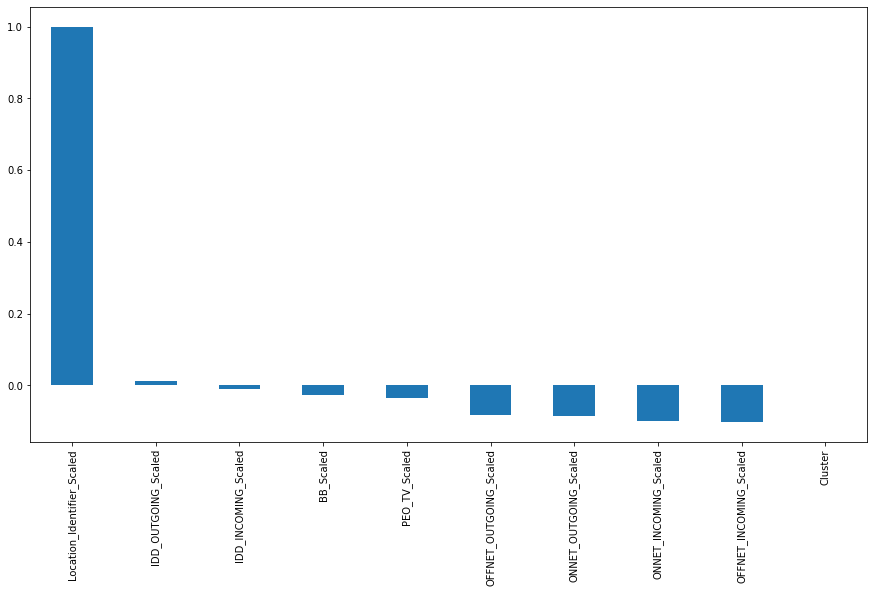

In [119]:
plt.figure(figsize=(15,8))
cluster_0.corr()['Location_Identifier_Scaled'].sort_values(ascending = False).plot(kind='bar')

In [121]:
cluster_0_loc = cluster_0.groupby('Location_Identifier').count()["event_source.hash"]

#### Feasible locations to offer BroadBand Internet compared to Double Play Users

In [101]:
cluster_2_bb_loc = cluster_2_bb.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

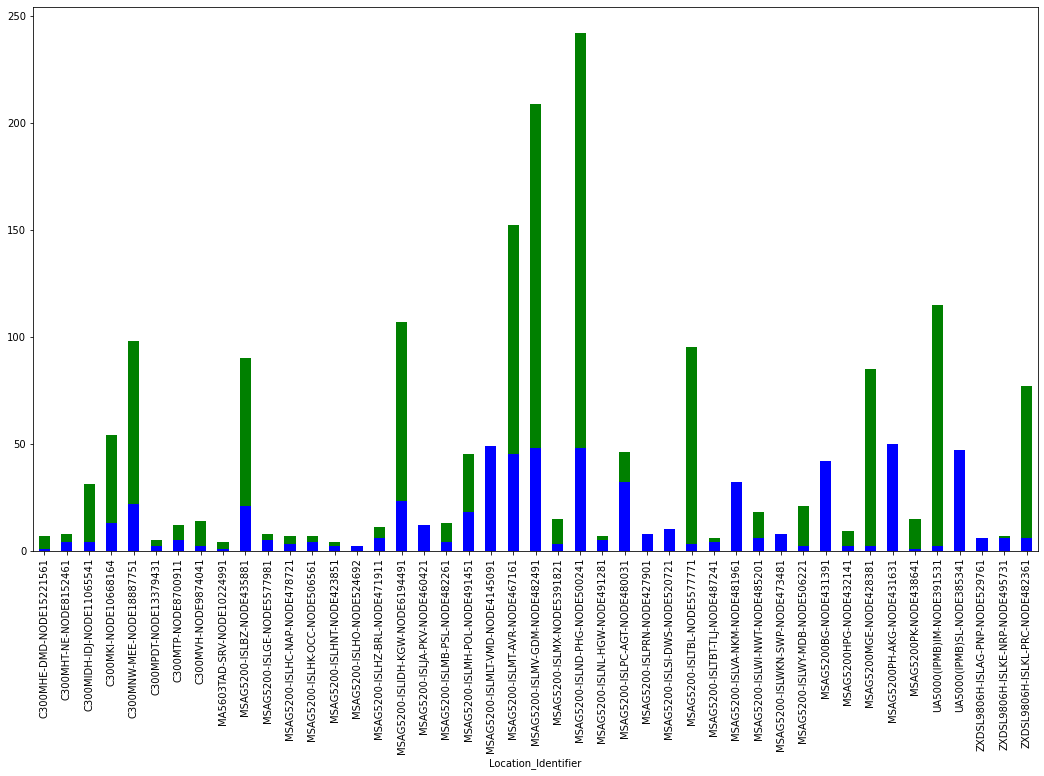

In [102]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [103]:
loc_precentage=(cluster_2_bb_loc/cluster_0_loc)*100

In [104]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
MSAG5200-ISLGE-NODE5577981          62.500000
MSAG5200-ISLHO-NODE524692          100.000000
MSAG5200-ISLJA-PKV-NODE460421      200.000000
MSAG5200-ISLMLT-VMD-NODE4145091    408.333333
MSAG5200-ISLNL-HGW-NODE491281       71.428571
MSAG5200-ISLPC-AGT-NODE480031       69.565217
MSAG5200-ISLPRN-NODE427901         400.000000
MSAG5200-ISLTBT-TLJ-NODE487241      80.000000
MSAG5200-ISLVA-NKM-NODE481961      177.777778
MSAG5200-ISLWI-NWT-NODE485201      100.000000
UA5000(IPMB)SL-NODE385341           61.038961
ZXDSL9806H-ISLAG-PNP-NODE529761     66.666667
ZXDSL9806H-ISLKE-NRP-NODE495731    120.000000
Name: event_source.hash, dtype: float64

In [105]:
# Relationship with Socio economic Factors

## PeoTV Usage analysis

In [106]:
peo_usage = user_profile[["Cluster","PEO_TV_Categorical"]].value_counts().sort_index()
peo_usage

Cluster  PEO_TV_Categorical
0        LOW                     54
         MEDIUM                   4
         NO                    1663
1        HIGH                   385
         LOW                     14
         MEDIUM                 162
2        HIGH                   211
         LOW                     58
         MEDIUM                 135
         NO                     621
dtype: int64

<AxesSubplot:ylabel='None'>

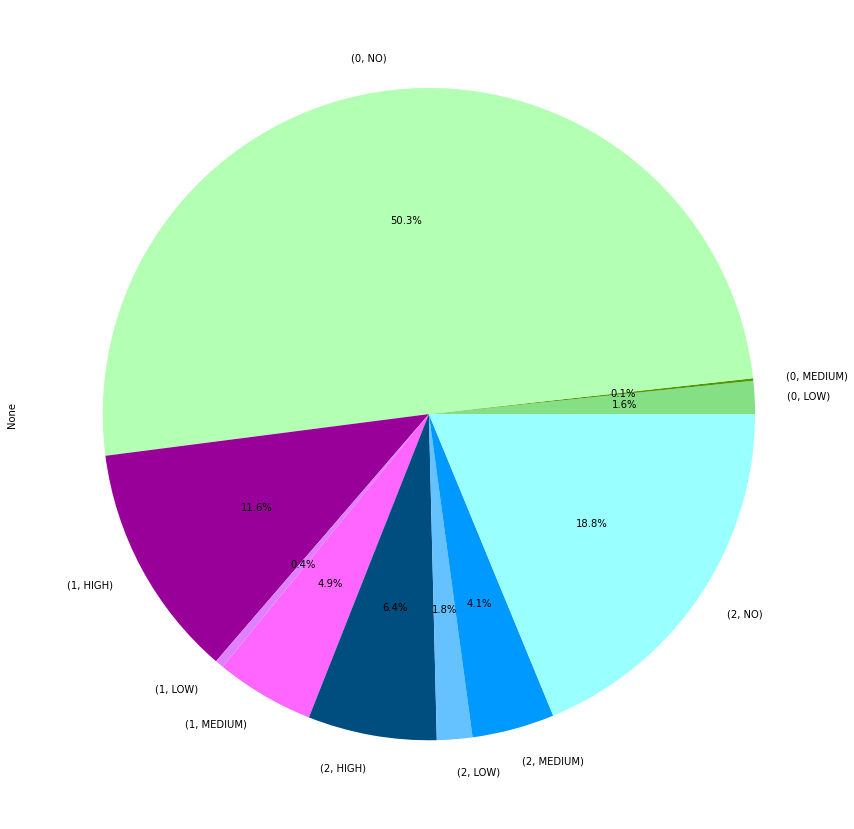

In [107]:
peo_usage.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%',colors=["#85e085","#4d9900","#b3ffb3","#990099","#df80ff","#ff66ff","#004d80","#66c2ff","#0099ff","#99ffff"])

<AxesSubplot:xlabel='Cluster,PEO_TV_Categorical'>

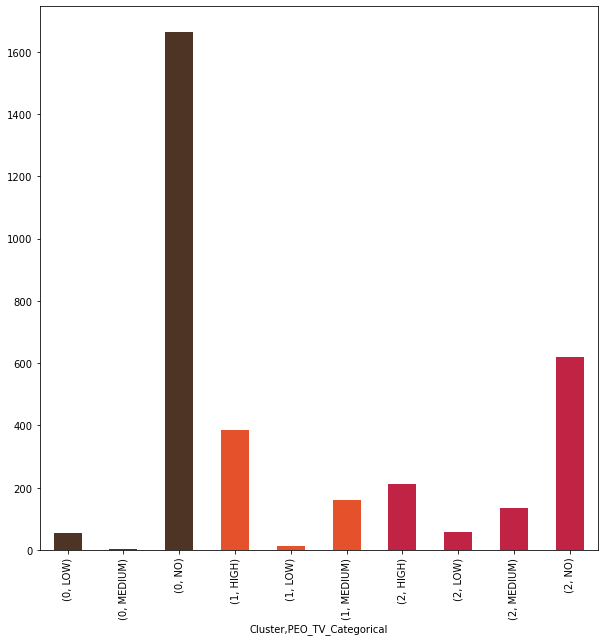

In [134]:
colors = ['#4D3425','#4D3425','#4D3425','#E4512B','#E4512B','#E4512B',"#C12345","#C12345","#C12345","#C12345"]
peo_usage.plot(stacked=True, kind="bar", figsize=(10,10),color=colors)

### Identifying factors for recommending PeoTV for Cluster 0

In [109]:
# Cluster 2 --> 39% PeoTV Users, first I'll Identify thier features and then compare with cluster 0

#### Feasible locations to offer PeoTV compared to Double Play Users

In [110]:
cluster_2_peo_loc = cluster_2_peo.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

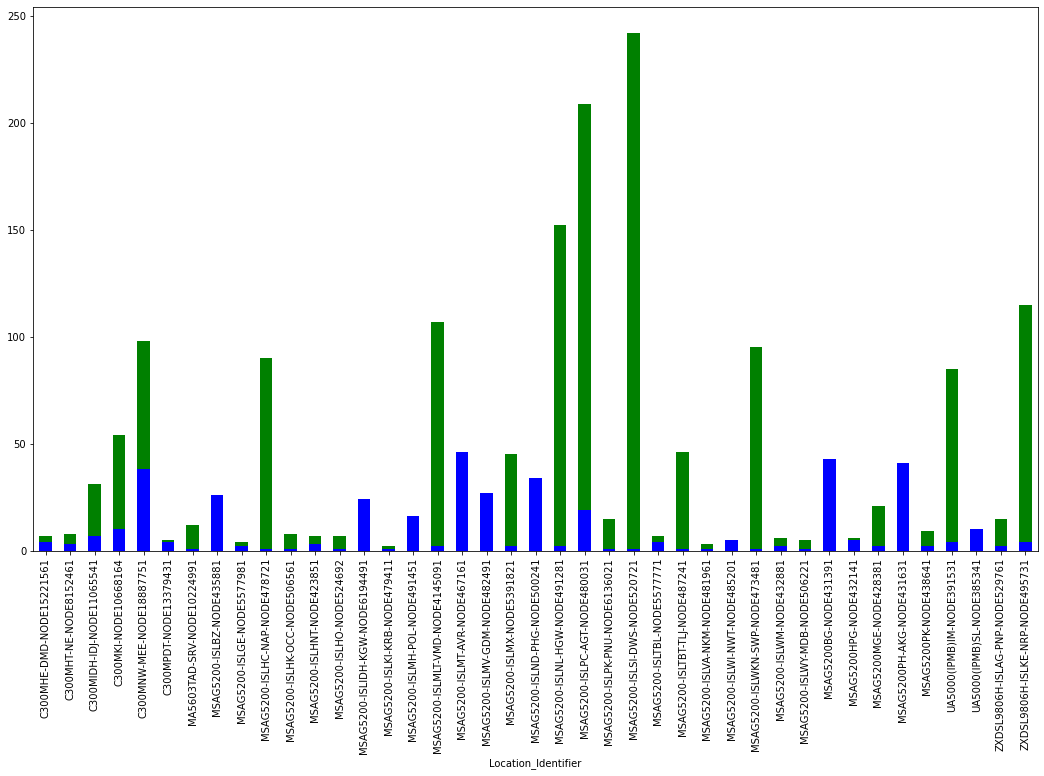

In [111]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
# green cluser 0
# blue Cluster 1 BB

In [112]:
loc_precentage=(cluster_2_peo_loc/cluster_0_loc)*100

In [113]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MPDT-NODE13379431               80.000000
MSAG5200-ISLHNT-NODE423851          75.000000
MSAG5200-ISLTBL-NODE5577771         66.666667
MSAG5200-ISLWI-NWT-NODE485201       83.333333
MSAG5200-ISLWM-NODE432881           66.666667
MSAG5200HPG-NODE432141             100.000000
ZXDSL9806H-ISLKE-NRP-NODE495731     80.000000
Name: event_source.hash, dtype: float64

### Feasible locations to offer peoTV and Broadband compared to Triple Play Users

In [114]:
cluster_1_peo_loc = cluster_1.groupby('Location_Identifier').count()["event_source.hash"]

<AxesSubplot:xlabel='Location_Identifier'>

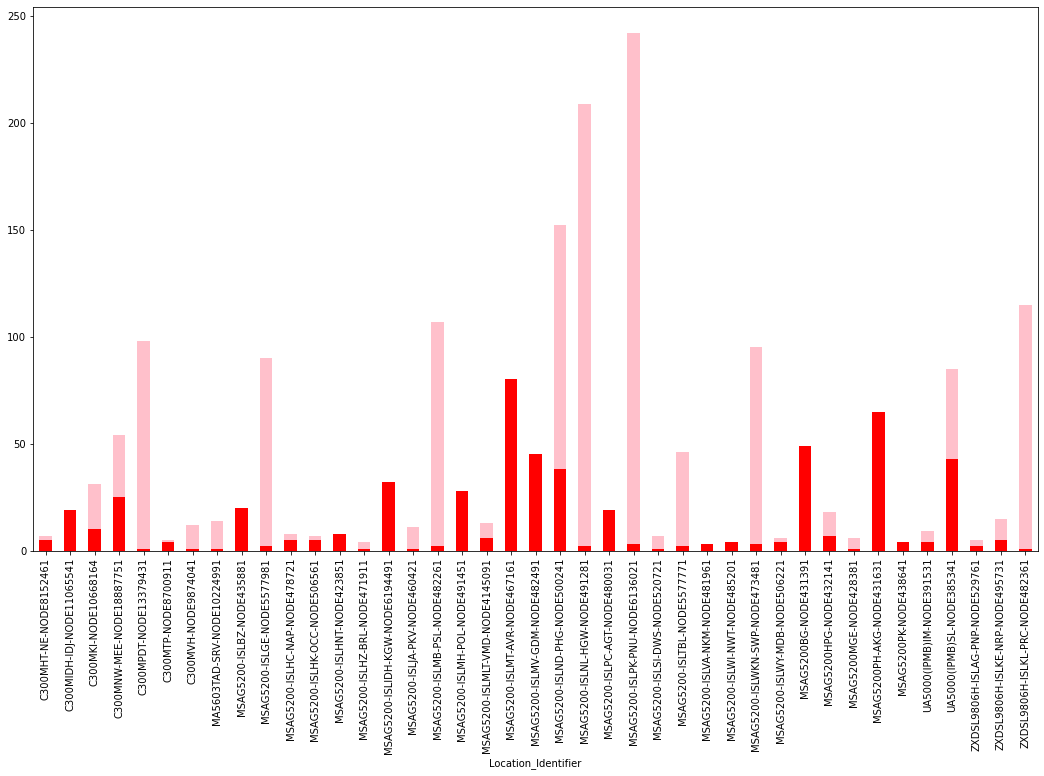

In [115]:
ax = cluster_0_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_1_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
# pink cluser 0
# red Cluster 1 PeoTV

In [116]:
loc_precentage=(cluster_1_peo_loc/cluster_0_loc)*100

In [117]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              62.500000
C300MIDH-IDJ-NODE11065541           61.290323
MSAG5200-ISLHC-NAP-NODE478721       71.428571
MSAG5200-ISLHK-OCC-NODE506561       71.428571
MSAG5200-ISLHNT-NODE423851         200.000000
MSAG5200-ISLMH-POL-NODE491451       62.222222
MSAG5200-ISLPK-PNU-NODE6136021     100.000000
MSAG5200-ISLWI-NWT-NODE485201       66.666667
MSAG5200HPG-NODE432141             140.000000
MSAG5200PK-NODE438641               80.000000
ZXDSL9806H-ISLKE-NRP-NODE495731    100.000000
Name: event_source.hash, dtype: float64